# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#установит формат чисел с плавающей точкой с 2мя знаками после запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#установим формат вывода всех столбцов
pd.set_option('display.max_columns', None)

#установим игнорирование предупреждающих сообщений
warnings.filterwarnings("ignore")

### Выведем на экран первые 10 строк

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


### Выведем информацию о таблице:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Общая информация по таблице** показала, что типы данных некоторых столбцов не соответствуют типам данных значений в них.
Необходимо перевести данные:  
  
в формат int64 из формата float64:

- last_price
- floors_total
- balcony
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- airports_nearest
- cityCenters_nearest
- days_exposition
  
в формат bool из формата object:  
  
- is_apartment  
  
в формат даты  
  
- first_day_exposition object  
  
названия столбцов 'parks_around3000, 'ponds_around3000', 'cityCenters_nearest' приведем к единому стилю:  
  
- разделитель слов симоволом _  
- заглавные буквы приведем к строчным.
  
  
Также что есть пропущеные значения в 14 столбцах:  
  
ceiling_height - высота потолков в метрах  
floors_total - количество этажей в доме  
living_area - жилая площадь  
is_apartment - признак что это апартаменты  
kitchen_area - площадь кухни  
balcony - наличие балкона  
locality_name - название населенного пункта  
airports_nearest - расстояние до ближайшего  
аэропорта cityCenters_nearest - расстояние до центра города  
parks_around3000 - число парков в радиусе 3 км  
parks_nearest - расстояние до ближайшего парка  
ponds_around3000 - число водоемов в радиусе 3 км  
ponds_nearest - расстояние до ближайшего водоема  
days_exposition - сколько дней размещено объявление (от публикации до снятия)  
  
Пропуски могли возникнуть при выгрузке данных, так как данные не из одного источника, есть так же человеческий фактор, например, если балкона нет то можно и не заполнять вовсе, плюс могла произойти нестыковка данных из двух источников по каким либо параметрам.

### Посмотрим на данные в графиках

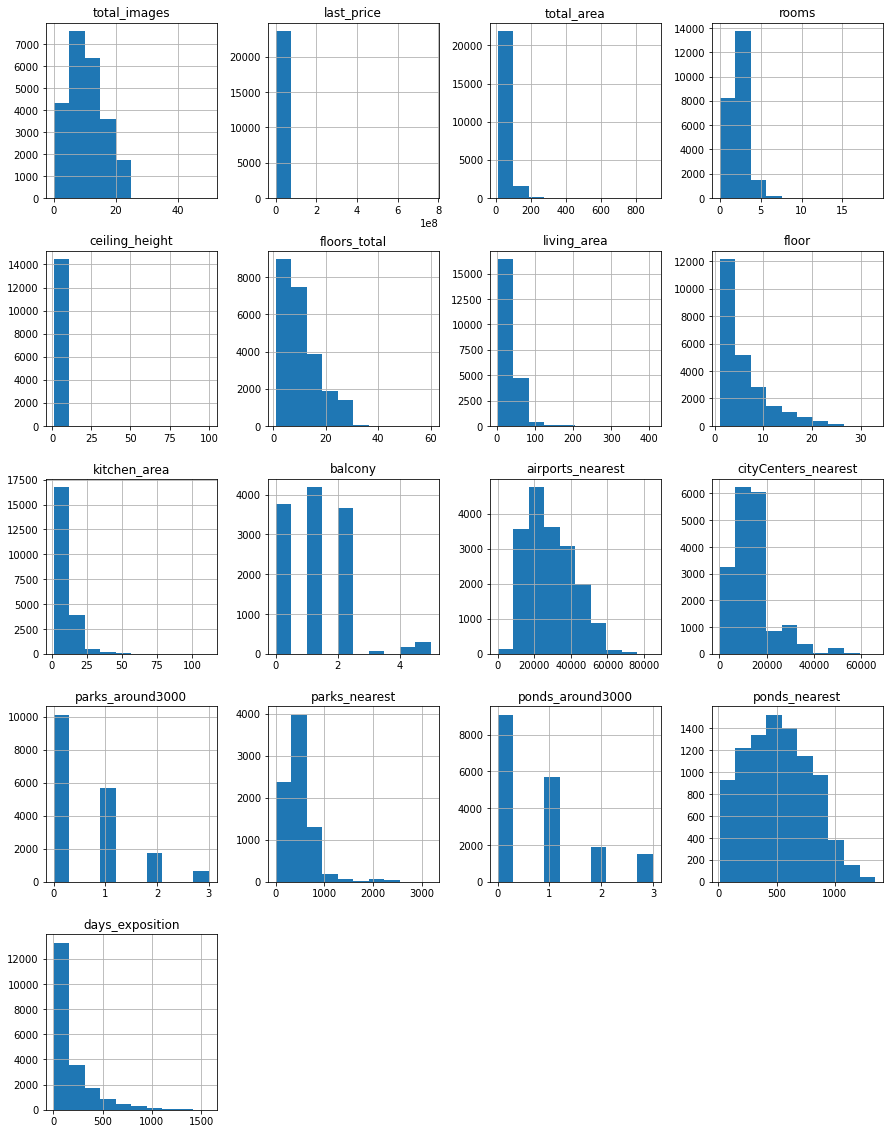

In [4]:
df.hist(figsize=(15, 20))
plt.show()

Из графиков видно, что:  
- количество загруженных изображений в основном до 20 штук  
- цена на момент снятия публикации есть во всех объявлениях  
- общая площдь квартир в основном до 100 кв. метров, но есть видимая доля от 100 до 200 квадратных метров и незначительная часть более 200, но до 1000 кв.метров  
- число комнат в основном до 4, но есть и более (до 20)  
- высота потолков - есть невероятные значения (до 100 м), *помним, что есть пропущенные значения и их больше половины*  
- этажность домов до 40, но есть и небоскребы (до 60 этажей), *помним, что есть пропущенные значения*  
- жилая площадь в основном до 100 кв.метров, однако есть значения около 400, *помним, что есть пропущенные значения*  
- этаж - с увеличением высоты этажа, количество объектов падает  
- площадь кухни - в основном до 25 кв. метров, *но мы помним, что есть пропущенные значения*  
- наличие балкона - есть квартиры с 5ю балконами, *помним, что есть пропущенные значения*  
- расстояние до ближайшего аэропорта - в основном в пределах 2-4 км, *но есть пропущенные значения*
- расстояние до центра города распределеятся плавно, пик приходится на 1-2 км от центра, *но помним, что есть пропущенные занчения*  
- число парков в радиусе 3 км - более 10тыс (чуть меньше половины) объектов без парков и далее на уменьшение от 1 до 4 парков), *есть пропущенные значения*  
- ближайшие парки находятся на расстоянии 1 км, *есть пропущенные занчения*  
- водоемы в радиусе 3 км - в основном 0 и далее на уменьшение (от 1 до 4), *есть пропущенные значения*  
- ближайшие водоемы находятся в пределах 1 км, *есть попущенные занчения*  
- сколько дней размещено объявление - не показательный график, так как надо приводить значения к формату даты.


**Вывод**  
  
В таблице заполнены данные о квартирах, выставленных на продажу в городе Санкт-Петербург и его окресностях. По каждой из них есть 2 вида данных: добавленные пользователем (площадь квартиры, этаж, количество балконов и др.) и картографические (расстояние до центра города, аэропорта и ближайшего парка, водоема), которые выгружались из других источников.  
  
Скорее всего данные взяты из разных источников, поэтому в них присутствуют пропуски. Также, возможно, пользователи некорректно заполняли данные о недвижимости из-за этого какие-то данные не сопоставились.  
  
Попробуем устранить пропуски и ошибки - сделаем более подробный анализ каждого столбца.  


## Предобработка данных

### Приведем названия столбцов к общему стилю

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                       'parks_around3000':'parks_around_3000',
                       'ponds_around3000':'ponds_around_3000'}
              )

#проверим
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Найдем и изучим пропущенные значения в столбцах

#### Выведем количество пропущенных значений для каждого столбца и процент пропусков от общего числа значений

In [7]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В 14 столбцах есть пропущенные значения:    
- ceiling_height - высота потолков в метрах  
- floors_total - количество этажей в доме  
- living_area - жилая площадь  
- is_apartment - признак что это апартаменты   
- kitchen_area - площадь кухни   
- balcony - наличие балкона  
- locality_name - название населенного пункта  
- airports_nearest - расстояние до ближайшего аэропорта  
- cityCenters_nearest - расстояние до центра города  
- parks_around3000 - число парков в радиусе 3 км  
- parks_nearest - расстояние до ближайшего парка  
- ponds_around3000 - число водоемов в радиусе 3 км  
- ponds_nearest - расстояние до ближайшего водоема  
- days_exposition - сколько дней размещено объявление (от публикации до снятия)  


###### Создадим словарь для описания названия колонок

In [8]:
# словарь с описанием столбцов
dict_df ={
    'airports_nearest':'расстояние до ближайшего аэропорта в метрах (м)',
    'balcony': 'число балконов',
    'ceiling_height': 'высота потолков (м)',
    'city_centers_nearest': 'расстояние до центра города (м)',
    'days_exposition': 'сколько дней было размещено объявление (от публикации до снятия)',
    'first_day_exposition': 'дата публикации',
    'floor': 'этаж',
    'floors_total': 'всего этажей в доме',
    'is_apartment': 'апартаменты (булевый тип)',
    'kitchen_area': 'площадь кухни в квадратных метрах (м²)',
    'last_price': 'цена на момент снятия с публикации',
    'living_area': 'жилая площадь в квадратных метрах (м²)',
    'locality_name': 'название населённого пункта',
    'open_plan': 'свободная планировка (булевый тип)',
    'parks_around_3000':'число парков в радиусе 3 км',
    'parks_nearest': 'расстояние до ближайшего парка (м)',
    'ponds_around_3000': 'число водоёмов в радиусе 3 км',
    'ponds_nearest': 'расстояние до ближайшего водоёма (м)',
    'rooms': 'число комнат',
    'studio': 'квартира-студия (булевый тип)',
    'total_area': 'площадь квартиры в квадратных метрах (м²)',
    'total_images': 'число фотографий квартиры в объявлении'
}

#словарь со значениями 
dict_name = pd.Series(dict_df)

  
###### Создадим функцию для просмотра данных о столбце
  

In [9]:
def column_info(column):
    print(column, ':', dict_name[column])
    print('тип данных:', df[column].dtypes)
    print('количество пропусков:', df[column].isna().sum())
    if df[column].dtypes != 'object':
        print('минимальное значение:', df[column].min(), '\nмаксимальное значение:', df[column].max() )
    print('уникальные значения:', '\n', df[column].value_counts())

#### Заполним пропущенные значения там, где это возможно. Изменим тип данных, где это необходимо.

Выведем названия всех столбцов на экран.

In [10]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Что ж, пойдем по порядку.  
Так как количество изображений нам совсем не интересно, пропустим этот столбцец. Тем более в нем нет пропущенных значений.

###### Столбец "last_price"

Посмотрим общую информацию о столбце

In [11]:
column_info('last_price')

last_price : цена на момент снятия с публикации
тип данных: float64
количество пропусков: 0
минимальное значение: 12190.0 
максимальное значение: 763000000.0
уникальные значения: 
 4500000.00     342
3500000.00     291
4000000.00     260
4300000.00     260
4200000.00     259
              ... 
10430000.00      1
9917600.00       1
3180500.00       1
7297000.00       1
4386000.00       1
Name: last_price, Length: 2978, dtype: int64


Есть объект, стоимость которого подозрительно низкая. Посмотрим в столбце last_price есть ли еще недвижимость стоимостью менее 1 млн. руб в городе Санкт-Петербург

In [12]:
df.loc[(df['last_price']<1000000)& (df['locality_name']=='Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.00,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,NaN,False,False,40.50,NaN,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00


Больше таких значений не обнаружено.  
  
Для квартиры с ценой 12190 нужно сопоставить цены с похожими квартирами. Для этого рассмотрим рядом находящиеся квартиры. Ограничим поиск расстоянием до аэропорта от 36000 до 37000, расстояние до центра города 9000-95000 и датой 1/01/2019 - 1/06/2019

In [13]:
df.loc[(df['airports_nearest']<37000)&
       (df['airports_nearest']>36000)&
       (df['city_centers_nearest']>9000)&
       (df['city_centers_nearest']<9500)&
       (df['first_day_exposition']>'2019-01-01T00:00:00')&
       (df['first_day_exposition']<'2019-06-01T00:00:00')
      ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
6965,10,4540000.00,45.50,2019-03-13T00:00:00,2,2.51,5.00,31.00,2,NaN,False,False,6.00,1.00,Санкт-Петербург,36773.00,9467.00,1.00,383.00,0.00,NaN,12.00
8112,20,14400000.00,95.30,2019-04-16T00:00:00,3,2.80,25.00,38.30,11,NaN,False,False,33.90,2.00,Санкт-Петербург,36533.00,9289.00,1.00,674.00,0.00,NaN,NaN
8781,14,9100000.00,78.00,2019-04-15T00:00:00,2,2.80,25.00,38.00,18,NaN,False,False,13.00,4.00,Санкт-Петербург,36533.00,9289.00,1.00,674.00,0.00,NaN,NaN
8793,7,12190.00,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,NaN,False,False,40.50,NaN,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00
9121,9,4560000.00,56.40,2019-03-30T00:00:00,3,2.50,5.00,41.20,5,NaN,False,False,5.70,1.00,Санкт-Петербург,36491.00,9162.00,2.00,30.00,0.00,NaN,27.00
12998,14,9500000.00,74.00,2019-04-22T00:00:00,2,2.85,25.00,35.00,24,False,False,False,14.00,5.00,Санкт-Петербург,36533.00,9289.00,1.00,674.00,0.00,NaN,NaN
15438,10,5700000.00,47.60,2019-04-12T00:00:00,2,3.00,5.00,28.10,2,NaN,False,False,8.00,NaN,Санкт-Петербург,36716.00,9004.00,2.00,352.00,0.00,NaN,6.00
17433,14,4700000.00,44.80,2019-03-09T00:00:00,2,2.51,5.00,17.10,2,NaN,False,False,5.70,NaN,Санкт-Петербург,36773.00,9467.00,1.00,383.00,0.00,NaN,12.00
20134,8,3624000.00,36.18,2019-03-21T00:00:00,1,2.74,15.00,15.20,9,NaN,False,False,10.26,2.00,Санкт-Петербург,36509.00,9265.00,1.00,866.00,0.00,NaN,18.00
20965,7,5800000.00,65.70,2019-01-28T00:00:00,3,2.50,9.00,48.50,8,NaN,False,False,6.20,1.00,Санкт-Петербург,36754.00,9431.00,1.00,552.00,0.00,NaN,19.00


In [14]:
df.loc[df['last_price']==12190, 'last_price'] = 12190000
#проверим
df.loc[(df['last_price']<1000000)& (df['locality_name']=='Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Разделим стоимость квартир на 1000000, чтобы удобнее было смотреть на цену. Округлим занчения до сотых, оставив 2 знака после запятой.

In [15]:
df['last_price'] = df['last_price']/1000000
df['last_price']


0       13.00
1        3.35
2        5.20
3       64.90
4       10.00
         ... 
23694    9.70
23695    3.10
23696    2.50
23697   11.47
23698    1.35
Name: last_price, Length: 23699, dtype: float64

**Вывод**
  
Изменили значения из "рублей" в "миллионов рублей". Найдено одно значение сильно выбиывающееся из остальных. Приведено к норме. Пропущенных значений в столбце "last_price" нет.

###### Столбец "total_area"

Выведем основную информацию о столбце

In [16]:
column_info('total_area')

total_area : площадь квартиры в квадратных метрах (м²)
тип данных: float64
количество пропусков: 0
минимальное значение: 12.0 
максимальное значение: 900.0
уникальные значения: 
 45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64


In [17]:
df['total_area'].describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

Построим гистограмму на котором отобразим количество объектов, площадь которых будет от 200 до 900 (это максимальная площадь объекта из данных). Количество корзин возьмем 100 для большей наглядности

<AxesSubplot:>

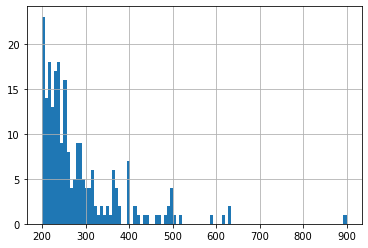

In [18]:
df['total_area'].hist(bins=100, range=(200,900))

Мы видим, что нет объектов от 640 до 890 квадратных метров. Выведем отдельно строку с объектом, площадь кторого 900 квадратов:

In [19]:
df[df['total_area']==900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420.00,900.00,2017-12-06T00:00:00,12,2.80,25.00,409.70,25,NaN,False,False,112.00,NaN,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106.00


Общая площадь 900 м², жилая 409.7, кухня - 112, цена 420 млн. Здравый смысл подсказывает что такое возможно. Оставим эту строку без изменений. 

Рассмотрим квартиры (объекты недвижимости) с площадью менее 30 м². Аналогичным образом построим гистограмму, ограничив значения от 12 (минимальное значение) до 29 и количеством корзин 100

<AxesSubplot:>

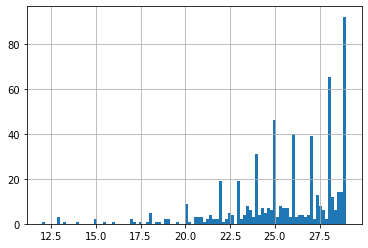

In [20]:
df['total_area'].hist(bins=100, range=(12,29))

Мне показалось необычными значения менее 17 квадратных метров, так как в объявлениях о прадаже квартир-студий не встречала менее этих значений. Выведем строки со значениями менее 17 м² на экран:

In [21]:
df[df['total_area'] < 17]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8886,10,2.45,15.50,2018-08-22T00:00:00,0,NaN,5.00,10.00,2,NaN,True,False,NaN,NaN,Санкт-Петербург,24326.00,4589.00,0.00,NaN,1.00,446.00,27.00
9412,5,2.10,16.00,2017-12-10T00:00:00,0,NaN,6.00,13.00,1,NaN,False,True,NaN,NaN,Санкт-Петербург,20735.00,2111.00,2.00,228.00,3.00,72.00,3.00
12040,5,1.90,15.00,2018-06-27T00:00:00,1,2.50,5.00,NaN,1,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00
16949,9,1.55,15.00,2018-08-21T00:00:00,1,2.70,9.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,51048.00,16376.00,0.00,NaN,1.00,1079.00,42.00
17961,3,1.40,13.00,2017-12-03T00:00:00,1,2.60,9.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,14350.00,15945.00,0.00,NaN,1.00,185.00,410.00
19546,3,1.85,13.00,2019-03-11T00:00:00,1,3.40,5.00,NaN,2,False,False,False,NaN,NaN,Санкт-Петербург,24915.00,5483.00,1.00,644.00,0.00,NaN,24.00
19558,2,1.69,13.20,2018-12-17T00:00:00,1,NaN,5.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,19891.00,4165.00,1.00,361.00,1.00,155.00,19.00
19642,5,1.19,14.00,2018-07-29T00:00:00,1,NaN,5.00,11.00,1,NaN,False,False,2.00,NaN,Санкт-Петербург,9898.00,11122.00,0.00,NaN,0.00,NaN,4.00
19807,0,3.80,13.00,2018-07-04T00:00:00,1,NaN,5.00,10.00,3,NaN,False,False,NaN,NaN,Санкт-Петербург,21302.00,1242.00,1.00,592.00,3.00,27.00,9.00
19904,4,2.40,12.00,2017-07-19T00:00:00,1,2.55,5.00,10.00,2,NaN,False,False,NaN,NaN,Санкт-Петербург,21314.00,964.00,1.00,886.00,2.00,45.00,200.00


Почти все из них отмечены False в столбце признака studio. Значит я ошиблась, предполагая, что это студии.  
В столбце "жилая площадь" указаны тоже маленькие числа. Что ж, оставим и эти значения пока без изменений.

**Вывод**
  
Пропущенных данных в столбце "total_area" нет.

###### Столбец "first_day_exposition"

Выведем основную информацию о столбце

In [22]:
column_info('first_day_exposition')

first_day_exposition : дата публикации
тип данных: object
количество пропусков: 0
уникальные значения: 
 2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-09-06T00:00:00      1
2015-07-17T00:00:00      1
2016-10-23T00:00:00      1
2015-07-01T00:00:00      1
2015-05-17T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64


Переведем значения столбца в формат datetime, отбросив значения времени, так оно не указано:

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

#проверим тип данных
df['first_day_exposition'].dtypes

dtype('<M8[ns]')

**Вывод**  
  
Изменили формат данных с objest на datetime64 (то же, что и <M*[ns]), отбросив время. Пропущенных значений в столбце "first_day_exposition" нет.

###### Столбец "rooms"

Выведем основную информацию о столбце

In [24]:
column_info('rooms')

rooms : число комнат
тип данных: int64
количество пропусков: 0
минимальное значение: 0 
максимальное значение: 19
уникальные значения: 
 1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


У нас есть 197 квартир с количеством комнат 0. Скорее всего это студии или квартиры со свободной планировкой. Проверим свои догадки и выведем их. Воспользуемся срезом по количеству комнат 0 и квартиры со свободной планировкой или студии.

In [25]:
df.query('rooms == 0 and (open_plan == True or studio ==True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2.45,27.00,2017-03-30,0,NaN,24.00,15.50,2,NaN,True,False,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00
349,4,2.32,25.00,2017-09-27,0,NaN,14.00,17.00,1,NaN,False,True,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
440,8,2.48,27.11,2018-03-12,0,NaN,17.00,24.75,4,NaN,True,False,NaN,2.00,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00
508,0,3.38,34.40,2017-03-28,0,NaN,26.00,24.30,19,NaN,False,True,NaN,1.00,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00
608,2,1.85,25.00,2019-02-20,0,NaN,10.00,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.20,26.00,2017-09-01,0,NaN,25.00,18.00,16,NaN,True,False,NaN,0.00,Санкт-Петербург,11405.00,13222.00,0.00,NaN,1.00,623.00,14.00
23442,0,2.50,27.70,2017-09-28,0,NaN,24.00,18.00,4,NaN,False,True,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.00
23554,15,3.35,26.00,2018-09-07,0,NaN,19.00,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.00,17092.00,0.00,NaN,2.00,112.00,31.00
23592,10,1.45,29.00,2017-11-11,0,NaN,9.00,18.00,8,NaN,False,True,NaN,2.00,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.00


Как видим все 197 строк вошли в этот срез. 

Проверим количество строк с квартирами-студиями:

In [26]:
display(len(df.loc[df['studio'] == True]))

149

Проверим вхождение уникальных значений в столбец 'rooms' в студиях:

In [27]:
df.query('studio == True')['rooms'] .value_counts()

0    138
1     11
Name: rooms, dtype: int64

Действительно, большинство владельцев картир-студий в объявлениях указывали количество комнат 0, однако 11 владельцев указали, что комнат 1. Заменим эти значения на 0 для приведения к единому значению.

In [28]:
df.loc[(df['rooms'] == 1) & (df['studio']==True),'rooms'] = 0

Проверим:

In [29]:
df.query('studio == True')['rooms'].value_counts()

0    149
Name: rooms, dtype: int64

**Вывод**

Пропущенных значений нет, в целом все в порядке. Для единообразия во всех квартирах-студиях сделали количество комнат равное 0.

###### Столбец ceiling_height

Посмотрим на сводную информацию в столбце:

In [30]:
column_info('ceiling_height')
df['ceiling_height'].describe()

ceiling_height : высота потолков (м)
тип данных: float64
количество пропусков: 9195
минимальное значение: 1.0 
максимальное значение: 100.0
уникальные значения: 
 2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Есть выбивающиеся и не поддающиеся логике значения, например, высота потолка 1 метр или 100 метров.  
Выведем на экран все уникальные значения в столбце.

In [31]:
print(sorted(df['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Значения 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0 и 100 - похожи на значения, в которых десятичная точка стоит не на своем месте. Изменим эти значения на /10.

In [32]:
ceiling_height_list = [22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0]
df.loc[df['ceiling_height'].isin(ceiling_height_list), 'ceiling_height'] /= 10

print(sorted(df['ceiling_height'].unique()))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.2600000000000002, 2.7, nan, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5

Я консультировалась с дизайнером интерьеров и он мне подсказал, что высота потолков колеблется от 2,3 до 11 метров. Ниже и выше - не бывает. А если и бывает, то 2,3 - для технического этажа, а более 11 - в двухэтажных квартирах. Так как в нашем датафрейме нет отметки двухэтажный ли объект, будем считать, что их нет.    
Выведем на экран количество квартир с потолками ниже 2,3 м. 

In [33]:
len(df[df['ceiling_height'] < 2.3])

17

Всего 17 значений. Давайте удалим их:

In [34]:
df = df.loc[(df['ceiling_height'] >= 2.3) | (df['ceiling_height'].isna())]
print('Количество объектов с потолком ниже 2,3 м. -', len(df[df['ceiling_height'] < 2.3]))
print('Количество объектов с потолком от 2,3 м. - ', len(df[df['ceiling_height'] >= 2.3]))
print('Количество объектов с пропущенными значениями - ', df['ceiling_height'].isna().sum())

Количество объектов с потолком ниже 2,3 м. - 0
Количество объектов с потолком от 2,3 м. -  14487
Количество объектов с пропущенными значениями -  9195


Посмотрим на значения выше 11 метров. Выведем все уникальные значения и их количество:

14 и 20. Удалим их тоже. 

In [35]:
df = df.loc[(df['ceiling_height'] <= 11) | (df['ceiling_height'].isna())]

#проверим

print('Количество объектов с потолком выше 11 м. -', len(df[df['ceiling_height'] > 11]))

Количество объектов с потолком выше 11 м. - 0


**Перейдем к заполнению пропусков.**

Заполним пропуски медианой, сгруппированную по количеству комнат.  
Для удобства создадим функцию для заполнения столбца датафрейма медианой, сгруппированной по другому столбцу

In [36]:
#Функция для заполнения пропусков столбца датафрейма медианой, сгруппированной по столбцу: 
#column_nan -столбец с пропусками, column_grouped - столбец для группировки. Наименование столбцов - в кавычки.

def complit_group_median(column_nan, column_group):
    print('Количество пропусков до изменений: ', df[column_nan].isna().sum())
    for value in df[column_group].unique():
        median_column_grouped = df.loc[df[column_group]==value, column_nan].median()
        df.loc[(df[column_nan].isna()) & (df[column_group]==value), column_nan] = median_column_grouped
    print('Количество пропусков после изменений: ', df[column_nan].isna().sum())
    

Применим функция для замены пропусков медианой, вычесленной для каждой группы. Группы создаем по количеству комнат.

In [37]:
complit_group_median('ceiling_height', 'rooms')

Количество пропусков до изменений:  9195
Количество пропусков после изменений:  1


Осталось одно пропущенное значение. Выводим его:

In [38]:
df.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32.25,374.60,2018-06-09,19,NaN,5.00,264.50,2,NaN,False,False,27.60,NaN,Санкт-Петербург,19497.00,3574.00,0.00,NaN,2.00,548.00,114.00


Значения заполнялись медианами, сгруппированными по количеству комнат, в этой строке количество комнат 19 комнатами - таких больше нет, поэтому медианное значение не рассчитано. Заполним его вручную медианным значением высоты потолка объекта с 16-ю комнатами.

In [39]:
#заполнение значения высоты потолка строки 14498 медианой:
df.loc[14498, 'ceiling_height'] = df.loc[df['rooms']==16, 'ceiling_height'].median()
print('Количество пропусков после внесения изменений:', df['ceiling_height'].isna().sum())

Количество пропусков после внесения изменений: 0


**Вывод**

В столбце ceiling_height заполнили пустые значения медианой по каждой группе, группировали по количеству комнат. Изменили значения, где запятая в вещественном числе стояла явно не в нужном месте. Удалили значения больше 11 метров и меньше 2,3, так как квартир с такими потолками не бывает. Возможная причина пропусков - владельцы квартир либо не знали высоту своих потолков и поэтому не заполнили, либо намеренно пропускали эту информацию, чтобы скрыть.

###### Столбец floors_total

Основная информация о столбце и его данных:

In [40]:
column_info('floors_total')
df['floors_total'].describe()

floors_total : всего этажей в доме
тип данных: float64
количество пропусков: 86
минимальное значение: 1.0 
максимальное значение: 60.0
уникальные значения: 
 5.00     5782
9.00     3760
16.00    1376
12.00    1360
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     831
3.00      668
7.00      592
14.00     551
18.00     504
24.00     469
8.00      390
2.00      380
15.00     364
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
29.00       1
60.00       1
52.00       1
34.00       1
33.00       1
Name: floors_total, dtype: int64


count   23594.00
mean       10.67
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

86 пропущенных значений.  
Выведем на экран первые 15 строк с незаполненным столбцом "floors_total"

In [41]:
df.query('floors_total.isna()').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11.64,65.20,2018-10-02,2,2.60,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,NaN,49.00
237,4,2.44,28.10,2016-11-23,1,2.64,NaN,20.75,1,NaN,False,False,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00
457,4,9.79,70.80,2015-08-01,2,2.60,NaN,38.40,12,NaN,False,False,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6.05,93.60,2017-04-06,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,123.00
1757,5,3.60,39.00,2017-04-22,1,2.64,NaN,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
1930,1,9.75,66.77,2016-05-13,2,2.60,NaN,NaN,4,NaN,False,False,NaN,0.00,Санкт-Петербург,39886.00,10660.00,1.00,2276.00,3.00,244.00,90.00
2392,7,5.40,53.00,2017-06-29,2,2.60,NaN,29.00,22,NaN,False,False,9.00,0.00,Санкт-Петербург,43074.00,10820.00,0.00,NaN,0.00,NaN,48.00
2846,4,2.33,27.80,2016-09-21,1,2.64,NaN,19.40,15,NaN,False,False,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,307.00
2952,10,6.50,54.30,2019-04-23,1,2.64,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.00,3148.00,0.00,NaN,0.00,NaN,NaN
3031,9,6.40,56.70,2018-03-27,2,2.60,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.00


Если бы этаж, на котором расположена квартира, в большинстве случаев был первый, то можно было бы предположить, что продавцы недвижимости не указывали этажность дома, потому что это одноэтажный дом. Но почти все квартиры находятся на разных этажах, значит дома многоэтажные. Вычислить этажность дома мы не сможем. Строк немного, можно было бы удалить их. Но мы заполним этот столбец, условно считая этаж расположения квартиры последним.

In [42]:
df.loc[df['floors_total'].isna(), ['floors_total']] = df['floor'] 
#проверим
print('Количество пропущенных значений:', df['floors_total'].isna().sum())

Количество пропущенных значений: 0


Заменим тип данных в этом столбце на целочисленный:

In [43]:
df['floors_total'] = df['floors_total'].astype('int')

**Вывод**  
  
Мы заменили пропуски на этаж на котором находятся квартиры, условно посчитав, что это последний этаж. Изменили тип данных с вещественого на целочисленное. Возможные причины пропусков в столбце "floors_total" - ошибки выгрузки; возможно заполняюшие сочли, что если это последний этаж, то можно не указывать количество этажей; сокрытие информации владельцем; заполняющий, например, риелтор, не имел данных.

###### Столбец "living_area"

Основная информация о столбце и его данных:

In [44]:
column_info('living_area')
df['living_area'].describe()

living_area : жилая площадь в квадратных метрах (м²)
тип данных: float64
количество пропусков: 1901
минимальное значение: 2.0 
максимальное значение: 409.7
уникальные значения: 
 18.00    881
17.00    675
30.00    598
16.00    486
20.00    480
        ... 
35.77      1
96.40      1
50.26      1
43.81      1
16.74      1
Name: living_area, Length: 1781, dtype: int64


count   21779.00
mean       34.46
std        22.03
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

Создадим новый столбец, который покажет коэффициент жилой площади в общей.

In [45]:
df['living_total_areas_ratio'] = df['living_area'] / df['total_area']

#Проверим 
df['living_total_areas_ratio'].describe()

count   21779.00
mean        0.56
std         0.11
min         0.02
25%         0.50
50%         0.57
75%         0.64
max         1.00
Name: living_total_areas_ratio, dtype: float64

Построим гистограмму распределения по новому столбцу, чтобы определить среднее значение в большинстве квартир

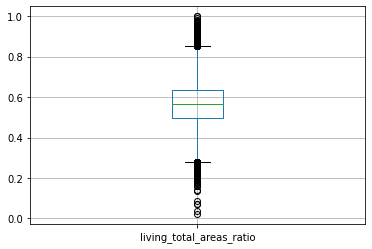

In [46]:
#plt.ylim(0.2, 0.9)
df.boxplot('living_total_areas_ratio')
plt.show()

Посмотрим также на описание столбца методом describe()

In [47]:
df['living_total_areas_ratio'].describe()

count   21779.00
mean        0.56
std         0.11
min         0.02
25%         0.50
50%         0.57
75%         0.64
max         1.00
Name: living_total_areas_ratio, dtype: float64

Отсюда я делаю вывод, что стандартное отношение жилой площади к общей лежит в пределах от 0.49 до 0.64. Медиана 0.57. Возьму этот коэффициент и применю к объектам недвижимости, где жилая площадь пропущена. Заполню пропуски по формуле жилая_площадь = общая * медиана_коэффициента.

Для начала посмотрим  количество таких значений, где коэффициент ниже границ "уса", а заодно и на сами строки 

In [48]:
print('Количество пропусков до изменений: ', df['living_area'].isna().sum())
df.loc[df['living_area'].isna(), ['living_area']] = df['total_area'] * df['living_total_areas_ratio'].median() 
print('Количество пропусков после изменений: ', df['living_area'].isna().sum())

Количество пропусков до изменений:  1901
Количество пропусков после изменений:  0


Выведем на экран первые 15 строк

In [49]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_total_areas_ratio
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,0.47
1,7,3.35,40.40,2018-12-04,1,2.64,11,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,0.46
2,10,5.20,56.00,2015-08-20,2,2.60,5,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,0.61
3,0,64.90,159.00,2015-07-24,3,2.65,14,90.28,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,NaN
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,0.32
5,10,2.89,30.40,2018-09-10,1,2.64,12,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,0.47
6,6,3.70,37.30,2017-11-02,1,2.64,26,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,0.28
7,5,7.92,71.60,2019-04-18,2,2.60,24,40.66,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,NaN
8,20,2.90,33.16,2018-05-23,1,2.64,27,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,0.47
9,18,5.40,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,0.71


Проверим на логические ошибки. Посчитаем количество строк, где жилая площадь больше общей.

In [50]:
print('Количество логических ошибок:', df.query('living_area > total_area')['living_area'].count())

Количество логических ошибок: 0


У нас есть строки, где жилая площадь равна 2 м² - минимальному значению столбца. Выведем все строки, жилая площадь которых менее 10 м² и коэффициент жилой площади к общей менее 0.5 (нижняя граница стандартных значений)

In [51]:
display(df.query('living_area < 10 and living_total_areas_ratio < 0.5'))
print('Количество объектов с жилой площадью менее 10 м² и коэффициентом жилой площади к общей ниже 0,5:', 
      df.query('living_area < 10 and living_total_areas_ratio < 0.5')['living_area'].count())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_total_areas_ratio
114,5,4.00,21.40,2019-02-07,1,2.90,8,8.30,7,NaN,False,False,6.30,NaN,Санкт-Петербург,27089.00,5791.00,2.00,488.00,1.00,286.00,NaN,0.39
680,14,7.20,43.00,2017-10-31,1,2.64,8,9.00,2,NaN,False,False,23.00,NaN,Санкт-Петербург,23900.00,5232.00,1.00,2137.00,1.00,933.00,296.00,0.21
1326,8,8.10,52.00,2017-01-29,2,2.70,25,9.00,15,NaN,False,False,32.00,2.00,Санкт-Петербург,35555.00,15561.00,0.00,NaN,1.00,1180.00,337.00,0.17
2309,10,4.20,62.40,2017-06-15,2,2.60,9,8.40,6,NaN,False,False,41.00,2.00,посёлок Шушары,23662.00,29448.00,0.00,NaN,0.00,NaN,111.00,0.13
3242,7,4.44,41.00,2017-07-02,1,2.64,17,3.00,17,NaN,False,False,11.00,NaN,Санкт-Петербург,19272.00,13073.00,0.00,NaN,0.00,NaN,216.00,0.07
4100,17,5.30,34.80,2017-06-19,1,2.70,23,9.00,15,NaN,False,False,17.10,0.00,Санкт-Петербург,33626.00,13495.00,0.00,NaN,0.00,NaN,30.00,0.26
7312,8,3.40,27.00,2018-02-21,2,2.50,15,9.00,4,NaN,False,False,16.00,NaN,Санкт-Петербург,50246.00,16444.00,1.00,617.00,0.00,NaN,NaN,0.33
8325,9,4.80,52.00,2017-10-25,2,2.60,5,9.00,2,NaN,False,False,6.00,1.00,Санкт-Петербург,33358.00,13171.00,0.00,NaN,2.00,118.00,119.00,0.17
13915,20,6.35,52.00,2018-02-06,2,3.00,6,2.00,2,NaN,False,False,9.00,NaN,Санкт-Петербург,32453.00,6521.00,0.00,NaN,1.00,1012.00,91.00,0.04
15833,20,4.60,33.00,2017-01-01,1,2.70,22,9.00,12,NaN,False,False,14.30,1.00,Санкт-Петербург,33803.00,13671.00,0.00,NaN,0.00,NaN,511.00,0.27


Количество объектов с жилой площадью менее 10 м² и коэффициентом жилой площади к общей ниже 0,5: 24


24 строки. Глядя на знчаения общей и жилой площади, у меня сложилось впечатление, что заполняющие ошиблись и не поставили первую цифру. Должны быть еще десятки в этих значениях. Думаю, здесь тоже ошибка заполнения. Заменим эти значения аналогично заполнению пропусков.

In [52]:
print('Количество объектов по условию до изменений:', 
      df.loc[(df['living_area'] < 10) & (df['living_total_areas_ratio'] < 0.5), ['living_area']].count())


df.loc[(df['living_area'] < 10) & (df['living_total_areas_ratio'] < 0.5), 'living_area'] = (df['total_area'] * df['living_total_areas_ratio']).median() 

print('Количество объектов по условию после изменений: ', 
      df.loc[(df['living_area'] < 10) & (df['living_total_areas_ratio'] < 0.5), ['living_area']].count())

Количество объектов по условию до изменений: living_area    24
dtype: int64
Количество объектов по условию после изменений:  living_area    0
dtype: int64


**Вывод**  
  
Пропущенные значения в столбце "living_area" заполнили по формуле:  
*жилая_площадь = общая * медиана_коэффициента_жилой_площади_от_общей*    
Заменили минимальные значения, где жилая площадь менее 10 м² и коэффициент мене 0,5, по аналогичной формуле.  
Возможные причины пропусков - заполняющий не владел этой информации, сокрытие информации. Возможные причины ошибок, заполняющий ошибся, не проставив десятки в значениях.

###### Столбец "is_apartment"

Основная информация о столбце и его данных:

In [53]:
column_info('is_apartment')
df['is_apartment'].describe()

is_apartment : апартаменты (булевый тип)
тип данных: object
количество пропусков: 20907
уникальные значения: 
 False    2723
True       50
Name: is_apartment, dtype: int64


count      2773
unique        2
top       False
freq       2723
Name: is_apartment, dtype: object

В столбце пользователи явно указывали True, если это апартаменты и указывали False или пропускали этот пункт, если не апартаменты.  
Заполним отсутствующие значенияя False

In [54]:
print('Количество пропусков до заполнения', df['is_apartment'].isna().sum())
print(df['is_apartment'].value_counts())

#заполняем пропуски False
df['is_apartment'] = df['is_apartment'].fillna(False)

print('Количество пропусков после заполнения', df['is_apartment'].isna().sum())
print(df['is_apartment'].value_counts())

Количество пропусков до заполнения 20907
False    2723
True       50
Name: is_apartment, dtype: int64
Количество пропусков после заполнения 0
False    23630
True        50
Name: is_apartment, dtype: int64


Приведем столбец к типу данных булевый:

In [55]:
df['is_apartment'] = df['is_apartment'].astype('bool')

#очередная проверка не помешает
df['is_apartment'].value_counts()

False    23630
True        50
Name: is_apartment, dtype: int64

**Вывод** 
  
Данные в столбце заполнили True, если это апартаменты. Остальные значения явно проставили False. Пропущенные значения обзначают что недвижимость - не апартаменты. Изменили тип данных в столбце на булевый.

###### Столбец "studio"

Выведем основную информацию о столбце и его данных:

In [56]:
column_info('studio')
df['studio'].describe()

studio : квартира-студия (булевый тип)
тип данных: bool
количество пропусков: 0
минимальное значение: False 
максимальное значение: True
уникальные значения: 
 False    23531
True       149
Name: studio, dtype: int64


count     23680
unique        2
top       False
freq      23531
Name: studio, dtype: object

**Вывод**  
  
В столбце нет пропущенных значений.

###### Столбец "open_plan"

Выведем основную информацию о столбце и его данных:

In [57]:
column_info('open_plan')
df['open_plan'].describe()

open_plan : свободная планировка (булевый тип)
тип данных: bool
количество пропусков: 0
минимальное значение: False 
максимальное значение: True
уникальные значения: 
 False    23613
True        67
Name: open_plan, dtype: int64


count     23680
unique        2
top       False
freq      23613
Name: open_plan, dtype: object

**Вывод**  
  
В столбце нет пропущенных значений.

###### Столбец "kitchen_area"

Выведем основную информацию о столбце и его данных:

In [58]:
column_info('kitchen_area')
df['kitchen_area'].describe()

kitchen_area : площадь кухни в квадратных метрах (м²)
тип данных: float64
количество пропусков: 2276
минимальное значение: 1.3 
максимальное значение: 112.0
уникальные значения: 
 6.00     1297
10.00    1260
8.00     1110
9.00     1101
7.00     1062
         ... 
13.73       1
14.74       1
53.10       1
13.41       1
16.74       1
Name: kitchen_area, Length: 970, dtype: int64


count   21404.00
mean       10.57
std         5.91
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

Смущает минимальное значение. Выведем данные об этом объекте:

In [59]:
df.query('kitchen_area == 1.3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_total_areas_ratio
20217,7,4.25,28.50,2019-05-01,1,2.80,14,19.50,10,False,False,False,1.30,NaN,Санкт-Петербург,37199.00,12721.00,0.00,NaN,0.00,NaN,NaN,0.68


В квартире 28,5 квадратных метров кухня 1,3 - это ненормально. Изменим его на 13, посчитав, что пользователь ошибся с запятой, заполняя. 

In [60]:
df.loc[df['kitchen_area']==1.3, 'kitchen_area'] = 13
df.loc[20217]

total_images                                  7
last_price                                 4.25
total_area                                28.50
first_day_exposition        2019-05-01 00:00:00
rooms                                         1
ceiling_height                             2.80
floors_total                                 14
living_area                               19.50
floor                                        10
is_apartment                              False
studio                                    False
open_plan                                 False
kitchen_area                              13.00
balcony                                     NaN
locality_name                   Санкт-Петербург
airports_nearest                       37199.00
city_centers_nearest                   12721.00
parks_around_3000                          0.00
parks_nearest                               NaN
ponds_around_3000                          0.00
ponds_nearest                           

Заполним пропущенные значения медианой для каждого объекта, сгруппированного по количеству комнат.

In [61]:
complit_group_median('kitchen_area','rooms')

Количество пропусков до изменений:  2276
Количество пропусков после изменений:  208


Пропущенные значения остались в квартирах, где комнат 0 - это студии и квартиры со свободной планировкой.

In [62]:
print('Количество пропусков в квартирах-студиях: \n', df.query('kitchen_area.isna()')['studio'].value_counts())
print('Количество пропусков в квартирах со свободной планировкой: \n', df.query('kitchen_area.isna()')['open_plan'].value_counts())

Количество пропусков в квартирах-студиях: 
 True     149
False     59
Name: studio, dtype: int64
Количество пропусков в квартирах со свободной планировкой: 
 False    149
True      59
Name: open_plan, dtype: int64


Заполним пропущенные значения в столбце медианой всего столбца:

In [63]:
print('Количество пропусков до заполнения', df['kitchen_area'].isna().sum())
#заполняем пропуски медианой по столбцу
df.loc[:,'kitchen_area'] = df.loc[:,'kitchen_area'].fillna(df.loc[:,'kitchen_area'].median())
print('Количество пропусков после заполнения', df['kitchen_area'].isna().sum())

Количество пропусков до заполнения 208
Количество пропусков после заполнения 0


###### Столбец "balcony"

Выведем основную информацию о столбце и его данных:

In [64]:
column_info('balcony')
df['balcony'].describe()

balcony : число балконов
тип данных: float64
количество пропусков: 11509
минимальное значение: 0.0 
максимальное значение: 5.0
уникальные значения: 
 1.00    4190
0.00    3757
2.00    3657
5.00     303
4.00     183
3.00      81
Name: balcony, dtype: int64


count   12171.00
mean        1.15
std         1.07
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: balcony, dtype: float64

Балконы пользователи отмечают, если он есть наверняка. Значит пропущенные значения - его нет. Проставим 0.

In [65]:
print('Количество пропусков до заполнения', df['balcony'].isna().sum())
#заполняем пропуски нулями
df['balcony'] = df['balcony'].fillna(0)
print('Количество пропусков после заполнения', df['balcony'].isna().sum())

Количество пропусков до заполнения 11509
Количество пропусков после заполнения 0


Изменим тип данных на целочисленный:

In [66]:
df['balcony'] = df['balcony'].astype('int')

**Вывод**  
  
Пропущенные значения в столбце 'balcony' означают, что балкона нет. Заполнили пропуски нулями. Изменили тип данных на целочисленный.

###### Столбец "locality_name"

Выведем основную информацию о столбце и его данных:

In [67]:
column_info('locality_name')
df['locality_name'].describe()

locality_name : название населённого пункта
тип данных: object
количество пропусков: 49
уникальные значения: 
 Санкт-Петербург                       15714
посёлок Мурино                          522
посёлок Шушары                          440
Всеволожск                              397
Пушкин                                  369
                                      ...  
коттеджный поселок Кивеннапа Север        1
деревня Вахнова Кара                      1
садовое товарищество Садко                1
деревня Большое Рейзино                   1
деревня Шпаньково                         1
Name: locality_name, Length: 364, dtype: int64


count               23631
unique                364
top       Санкт-Петербург
freq                15714
Name: locality_name, dtype: object

Удалим 48 строк с пропущенными значениями, так как восстановить их не представляется возможным.

In [68]:
print('Количество пропусков до удаления', df['locality_name'].isna().sum())
df = df.dropna(subset=['locality_name'])
print('Количество пропусков после удаления', df['locality_name'].isna().sum())

Количество пропусков до удаления 49
Количество пропусков после удаления 0


Выведем список уникальных значений, так как у нас была подсказка;) 

In [69]:
print(sorted(df['locality_name'].unique()))

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

Устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.

In [70]:
print('Количество уникальных значений до устранения неявных дубликатов:', len(df['locality_name'].unique()))

# создадим словарь слов, которые будем удалять
dict_word_to_del = ['городской ', 'поселок ', 'посёлок ', 'деревня ', 
                'коттеджный ', 'городского типа ', 'имени ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ']

# удаляем значения из созданного словаря в столбце 'locality_name'
for string in dict_word_to_del:
    df['locality_name'] = df['locality_name'].str.replace(string, '')

# отсортируем полученные значения и проверим полученный список:
print('\n', sorted(df['locality_name'].unique()))

print('\nКоличество уникальных значений после устранения неявных дубликатов:', len(df['locality_name'].unique()))

Количество уникальных значений до устранения неявных дубликатов: 364

 ['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино'

**Вывод**  
  
Удалено 48 строк, так как узнать расположение объекта не представляется возможным и 48 - незначительная часть, которой можно пожертвовать.  
Устранили неявные дубликаты удалением слов, обозначающих тип населенного пункта, тем самым уменьшили количество уникальных названий с 364 до 305. 
Возможнные причины пропусков и различного стиля написания населенных пунктов - разные источники данных, человеческий фактор при заполнении объявлений.

###### Столбец "airpots_nearest"

Выведем основную информацию о столбце и его данных:

In [71]:
column_info('airports_nearest')
df['airports_nearest'].describe()

airports_nearest : расстояние до ближайшего аэропорта в метрах (м)
тип данных: float64
количество пропусков: 5523
минимальное значение: 0.0 
максимальное значение: 84869.0
уникальные значения: 
 37434.00    61
21928.00    32
39946.00    30
44870.00    30
37407.00    27
            ..
42695.00     1
53478.00     1
20335.00     1
33699.00     1
20875.00     1
Name: airports_nearest, Length: 8257, dtype: int64


count   18108.00
mean    28804.49
std     12638.78
min         0.00
25%     18575.75
50%     26756.50
75%     37298.00
max     84869.00
Name: airports_nearest, dtype: float64

Минимальное значение равно 0. Это значит, что недвижимость находится в самом аэропорту. Выведем все значения, где в столбце расстояние до аэропорта равно 0.

In [72]:
display(df.loc[df['airports_nearest']==0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_total_areas_ratio
21085,0,7.00,34.70,2018-09-23,1,2.70,9,19.80,3,False,False,False,6.00,2,Санкт-Петербург,0.00,22801.00,0.00,NaN,0.00,NaN,60.00,0.57


Всего одно значение. Оставим его без изменений.

Если посмотреть на карту, то на самом дальнем расстоянии от аэропорта Пулково находится Вознесенье, которе есть в списке населенных пунктов. Это расстояние равно 370 км. или 370000 м. В данных самое дальнее расстояние - 84869 м. Вот и отлично, нет аномальных значений.  
Выведем эти значения на экран, проверим какое расстояние проставлено. 

In [73]:
display(df.query('locality_name == "Вознесенье"'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_total_areas_ratio
10925,15,2.00,51.50,2017-10-13,3,2.65,3,32.00,1,False,False,False,9.50,1,Вознесенье,NaN,NaN,NaN,NaN,NaN,NaN,180.00,0.62
17952,7,1.05,41.00,2017-06-29,2,2.60,2,27.00,1,False,False,False,6.00,0,Вознесенье,NaN,NaN,NaN,NaN,NaN,NaN,97.00,0.66


2 значения с названием населенного пункта "Вознесенье". Заполним их значением 370000.

In [74]:
df.loc[df['locality_name'] == "Вознесенье", ['airports_nearest']] = 370000

Выведем первые 25 значений с заполненым расстоянием до аэропорта.

In [75]:
display(df.loc[df['airports_nearest'].notnull(), ['locality_name']].head(25))

,locality_name
0,Санкт-Петербург
1,Шушары
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
6,Парголово
7,Санкт-Петербург
9,Санкт-Петербург
10,Санкт-Петербург
11,Ломоносов


В основном заполнены в Петербургских объектах и близлежащих. 

Выведем первые 25 строк с незаполненным столбцом "airports_nearest"

In [76]:
display(df.loc[df['airports_nearest'].isna(), ['locality_name']].head(25))

,locality_name
5,Янино-1
8,Мурино
12,Сертолово
22,Кудрово
30,Коммунар
37,Красный Бор
38,Мурино
47,Гатчина
60,Мурино
62,Сертолово


Есть пропущенные значения и в Петербурге, и в его районах, например Кудрово.  
Пропуски оставим, так как они не будут влиять на дальнейший анализ.


**Вывод**  
  
В столбце есть незаполненые значения, которые нам пока не удалось заполнить. Пропуски возможны из-за технического сбоя при автоматическом заполнении, так как эти данные не заполнялись вручную.

###### Столбец "city_centers_nearest"

Выведем основную информацию о столбце и его данных:

In [77]:
column_info('city_centers_nearest')
df['city_centers_nearest'].describe()

city_centers_nearest : расстояние до центра города (м)
тип данных: float64
количество пропусков: 5500
минимальное значение: 181.0 
максимальное значение: 65968.0
уникальные значения: 
 8460.00     61
20802.00    32
10720.00    30
8434.00     27
20444.00    26
            ..
5278.00      1
11575.00     1
3205.00      1
12747.00     1
4234.00      1
Name: city_centers_nearest, Length: 7627, dtype: int64


count   18131.00
mean    14197.38
std      8607.91
min       181.00
25%      9241.00
50%     13105.00
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64

5,5 тысяч пропусков:( И с ними я тоже пока не знаю что делать. Оставим как есть.

**Вывод**  
  
В столбце есть незаполненые значения, которые нам пока не удалось заполнить. Пропуски возможны из-за технического сбоя при автоматическом заполнении, так как эти данные не заполнялись вручную.

###### Столбец parks_around_3000


Выведем основную информацию о столбце и его данных:

In [78]:
column_info('parks_around_3000')
df['parks_around_3000'].describe()

parks_around_3000 : число парков в радиусе 3 км
тип данных: float64
количество пропусков: 5499
минимальное значение: 0.0 
максимальное значение: 3.0
уникальные значения: 
 0.00    10076
1.00     5668
2.00     1743
3.00      645
Name: parks_around_3000, dtype: int64


count   18132.00
mean        0.61
std         0.80
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         3.00
Name: parks_around_3000, dtype: float64

Так количество пропусков примерно соответствует количеству пропусков в двух предыдущих столбац, предположу, что данные автоматически не заполнились из-за названий населенных пунктов, система, которая заполняла эти значения не смогла их распознать. Оставим эти значения пустыми.

###### Столбец parks_nearest

Выведем основную информацию о столбце и его данных:

In [79]:
column_info('parks_nearest')
df['parks_nearest'].describe()

parks_nearest : расстояние до ближайшего парка (м)
тип данных: float64
количество пропусков: 15571
минимальное значение: 1.0 
максимальное значение: 3190.0
уникальные значения: 
 441.00     67
173.00     41
392.00     41
456.00     40
471.00     32
           ..
863.00      1
828.00      1
1909.00     1
1049.00     1
929.00      1
Name: parks_nearest, Length: 994, dtype: int64


count   8060.00
mean     490.78
std      342.59
min        1.00
25%      287.75
50%      454.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

Здесь уже в три раза больше незаполненных значений. Треть из них, опять же, вероятно, не заполнена в связи с невозможностью системы распознать название населенного пункта, а две трети по каким-то другим причинам. Возможно, парков и вовсе рядом нет. Например если это небольшой населенный пункт, то там скорее лес, а не парк.  
Оставим эти значения незаполненными.

###### Столбец ponds_around_3000

Выведем основную информацию о столбце и его данных:

In [80]:
column_info('ponds_around_3000')
df['ponds_around_3000'].describe()

ponds_around_3000 : число водоёмов в радиусе 3 км
тип данных: float64
количество пропусков: 5499
минимальное значение: 0.0 
максимальное значение: 3.0
уникальные значения: 
 0.00    9051
1.00    5700
2.00    1888
3.00    1493
Name: ponds_around_3000, dtype: int64


count   18132.00
mean        0.77
std         0.94
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         3.00
Name: ponds_around_3000, dtype: float64

Опять же количество пропусков примерно соответствует количеству пропусков в столбцах "расстояние до аэропорта" и "расстояние до центра города". Я продолжаю считать, что данные автоматически не заполнились из-за названий населенных пунктов, которые  заполняющая система не смогла распознать. Оставим эти значения пустыми.

###### Столбец ponds_nearest

Выведем основную информацию о столбце и его данных:

In [81]:
column_info('ponds_nearest')
df['ponds_nearest'].describe()

ponds_nearest : расстояние до ближайшего водоёма (м)
тип данных: float64
количество пропусков: 14550
минимальное значение: 13.0 
максимальное значение: 1344.0
уникальные значения: 
 427.00     70
454.00     41
153.00     40
433.00     39
564.00     37
           ..
156.00      1
914.00      1
1168.00     1
1021.00     1
995.00      1
Name: ponds_nearest, Length: 1096, dtype: int64


count   9081.00
mean     518.13
std      277.79
min       13.00
25%      294.00
50%      503.00
75%      730.00
max     1344.00
Name: ponds_nearest, dtype: float64

Здесь тоже в три раза больше незаполненных значений, чем в предыдущем столбце: треть из них по моему предположению не заполнена в связи с невозможностью системы распознать название населенного пункта, а две трети по каким-то другим причинам. Возможно, пруда рядом нет совсем.  
Оставим эти значения незаполненными.

###### Столбец days_exposition

Выведем основную информацию о столбце и его данных:

In [82]:
column_info('days_exposition')
df['days_exposition'].describe()

days_exposition : сколько дней было размещено объявление (от публикации до снятия)
тип данных: float64
количество пропусков: 3176
минимальное значение: 1.0 
максимальное значение: 1580.0
уникальные значения: 
 45.00      876
60.00      538
7.00       234
30.00      208
90.00      203
          ... 
969.00       1
1.00         1
1147.00      1
1148.00      1
1174.00      1
Name: days_exposition, Length: 1141, dtype: int64


count   20455.00
mean      180.81
std       219.83
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

3 тысячи пропусков. Выведем гистограмму по пропущенным данным, распределим количество объявлений по дате размещения:

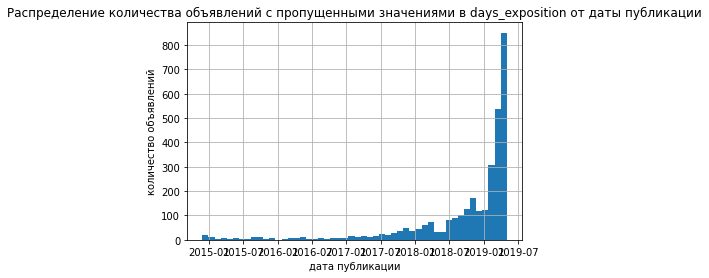

In [83]:
#поместим пропущенные строки в новую переменную:
days_nan = df.query('days_exposition.isna()')

#построим гистограмму по дате размещения объявлений:
days_nan['first_day_exposition'].hist(bins=50).set(xlabel='дата публикации', 
                                                   ylabel='количество объявлений', 
                                                   title='Распределение количества объявлений с пропущенными значениями в days_exposition от даты публикации');

Чем ближе дата к концу гистограммы, тем больше в датафрейме объявлений с пропусками в столбце. Можно предположить, что объекты недвижимости не были проданы, либо не сняты с продажи.  
Заполним пропущенные строки значением, равным самому последнему дню публикации минус дата публикации.

In [84]:
print('Количество пропусков до заполнения: ', df['days_exposition'].isna().sum())

#дата последнего объявления
first_day_exp_max = df['first_day_exposition'].max()

#заполняем пропуски:
df.loc[df['days_exposition'].isna(), 'days_exposition'] = (first_day_exp_max - df.loc[df['days_exposition'].isna(), 'first_day_exposition']).dt.days


print('Количество пропусков после заполнения: ', df['days_exposition'].isna().sum())    

Количество пропусков до заполнения:  3176
Количество пропусков после заполнения:  0


Изменим тип данных на целочисленный

In [85]:
df['days_exposition'] = df['days_exposition'].astype('int')

**Вывод**  
  
Заполнили пропуски разницей между датой последнего размещенного объявления и датой публикации. Изменили тип данных на целочисленный.
Причины пропусков - объявление не закрыто.

  
  
Выведем информацию о датафрейме еще раз, удостовериться в изменениях:

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23631 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23631 non-null  int64         
 1   last_price                23631 non-null  float64       
 2   total_area                23631 non-null  float64       
 3   first_day_exposition      23631 non-null  datetime64[ns]
 4   rooms                     23631 non-null  int64         
 5   ceiling_height            23631 non-null  float64       
 6   floors_total              23631 non-null  int64         
 7   living_area               23631 non-null  float64       
 8   floor                     23631 non-null  int64         
 9   is_apartment              23631 non-null  bool          
 10  studio                    23631 non-null  bool          
 11  open_plan                 23631 non-null  bool          
 12  kitchen_area      

Незаполненными остались строки в столбцах airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest

А также в столбце living_total_areas_ratio остались пропуски, так как мы создавали этот столбец, чтобы заполнить пропуски в living_area. Давайте дозаполним пропущенные значения.

In [87]:
df['living_total_areas_ratio'] = df['living_total_areas_ratio'].fillna(df['living_area'] / df['total_area'])
#проверяем
df['living_total_areas_ratio'].isna().sum()

0

#### Проверка на явные дубликаты

In [88]:
df.duplicated().sum()

0

**Вывод**  

Явные дубликаты в данных отсутствуют.  

**Общий вывод по разделу 2.2**

В процессе предобработки данных пропуски значений были заполнены в зависимости от ситуации:

- медианой по группам значений либо общей медианой по всем значениям;
- медианой вычесленного коэффициента, отношения жилой площади к общей;
- там, где логически это возможно – конкретными значениями (например False, 0);
- пропуски значений столбца days_exposition заполнены разницей  между датой последнего размещенного объявления и датой публикации. (скорее всего объявления с пропусками имеют статус незакрытых).
В случаях, когда заполнение невозможно, строки удалили (отсутствие наименования населенного пункта в locality_name, количество этажей в доме, floors_total)

Значения столбца locality_name приведены к единому стилю - только название населенного пункта без лишних слов.  
  
Проверили на явные дубликаты - отсутствуют.

Причины пропусков в датафрейме:

- незаполнение поля клиентом в случае отсутствия информации;
- сбор данных из разных источников с изначально отличающейся структурой данных;
- сбой при выгрузке данных.

### Посчитаем и добавим в таблицу новые столбцы

#### Добавляем в таблицу столбец "цена одного квадратного метра"

In [89]:
df['price_square_meter'] = df['last_price'] / df['total_area']

#### Добавляем в таблицу столбцы "день недели публикации", "месяц публикации", "год публикации" 
0 — понедельник, 1 — вторник и так далее

In [90]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
#посмотрим на заполняемость годов месяцами (полные годы нам представлены или нет)
display(df.groupby(['year_exposition'])['month_exposition'].unique())

year_exposition
2014                                   [12, 11]
2015    [8, 7, 10, 12, 9, 2, 11, 1, 6, 3, 5, 4]
2016    [6, 9, 10, 4, 5, 3, 12, 11, 2, 8, 1, 7]
2017    [11, 2, 7, 1, 9, 4, 5, 12, 10, 6, 3, 8]
2018    [12, 6, 9, 5, 8, 3, 2, 10, 11, 1, 7, 4]
2019                            [3, 4, 1, 2, 5]
Name: month_exposition, dtype: object

Объявления в нашем наборе данных имеют 2 неполных года - 2014 (только ноябрь и декабрь) и 2019 (с января по май). Будем иметь это в виду.

#### Добавляем в таблицу столбец "тип этажа квартиры" 
Значения — «первый», «последний», «другой»


In [91]:
#функция, определяющая категорию этажа:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применяем метод apply и функцию floor_type к созданному столбцу floor_type:
df['floor_type'] = df.apply(floor_type, axis=1)  

#проверяем
df['floor_type'].value_counts()

другой       17313
последний     3409
первый        2909
Name: floor_type, dtype: int64

#### Добавляем в таблицу столбец "расстояние до центра"  в километрах

In [92]:
df['city_centers_average'] = (df['city_centers_nearest'] / 1000).round()

#проверяем
df['city_centers_average'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

In [93]:
#изменим тип данных в столбце city_centers_average на целочисленный
#df['city_centers_average'].astype('int')
#а, нет, не изменим, у нас есть попуски в столбце(

Выведем первые 5 строк датафрейма для самопроверки:

In [94]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_total_areas_ratio,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_average
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,57,0.47,0.12,3,3,2019,другой,16.00
1,7,3.35,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,0.46,0.08,1,12,2018,первый,19.00
2,10,5.20,56.00,2015-08-20,2,2.60,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,0.61,0.09,3,8,2015,другой,14.00
3,0,64.90,159.00,2015-07-24,3,2.65,14,90.28,9,False,False,False,9.50,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424,0.57,0.41,4,7,2015,другой,7.00
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,0.32,0.10,1,6,2018,другой,8.00


**Вывод**  
  
Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа и расстояния до центра.

### Исследовательский анализ данных

#### Рассмотрим разные параметры. 

##### Изучим общую площадь, жилую и площадь кухни:

Выведем описание столбцов общая, жилая и площадь кухни, а также соданный ранее столбец коэффициент отношения жилой к общей:

In [95]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23631.00,23631.00,23631.00
mean,60.34,34.59,10.45
std,35.67,22.33,5.64
min,12.00,7.38,2.00
25%,40.00,19.00,7.33
50%,52.00,30.00,9.05
75%,69.75,42.10,11.50
max,900.00,409.70,112.00


###### Общая площадь

Выведем диаграмму размаха:

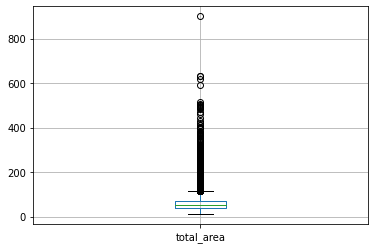

In [96]:
df.boxplot('total_area')
plt.show()

Мы помним, что у нас в данных был объект с площадью 900 м², это мы также видим на диаграмме. Было несколько объектов в районе 600. Из графика видно, что есть большое количество значений примерно от 160 до 550. Однако все эти значения лежат за пределами границы верхнего "уса" - а значит это выбросы.  
Для наглядности изменим масштаб графика.

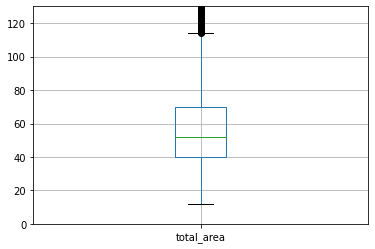

In [97]:
plt.ylim(0, 130)
df.boxplot('total_area')
plt.show()

Большая часть значений лежит в диапазоне от 40 до 70 м².  
Нижний "ус" упирается в минимальное значение (12 м²). Повторюсь, в объявлениях на сайтах недвижимости я не встречала квартиры менее 17 м². //Может 12 - это комната в коммунальной квартире?  
Верхний "ус" заканчивается около 118 м².  
Похоже на правду.

Построим гистограмму распределения:

<function matplotlib.pyplot.show(close=None, block=None)>

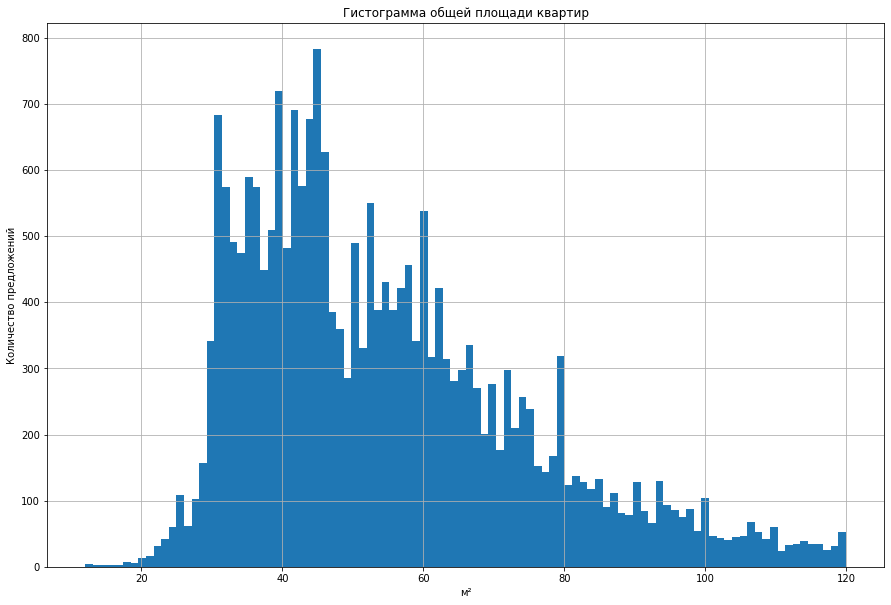

In [98]:
df.query('total_area >= 12 and total_area <= 120')['total_area'].hist(bins=100, figsize=(15,10))
plt.xlabel('м²')
plt.ylabel('Количество предложений')
plt.title('Гистограмма общей площади квартир')
plt.grid(True)
plt.show

Диаграмма показывает, что распределение стремится к нормальному, резко возрастая по количеству объявлений с объектами недвижимости, площадь которых около 30 м². Максимальное количество объявлений размещено для квартир с общей площадью 45-47 м² и идет на спад до 50 объявлений для квартир площадью до 118 м². Квариры с общей площадью более 118 метров встречаются все реже и реже.  

Выведем квартиры в пределах от 30 до 50, чтобы подробнее посмотреть всплески на графике.

<AxesSubplot:>

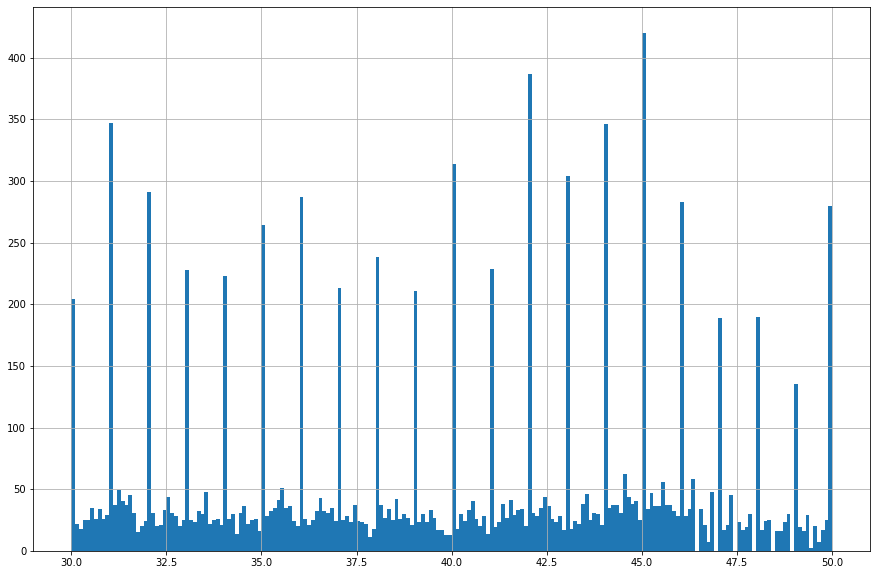

In [99]:
df.query('total_area >= 30 and total_area <= 50')['total_area'].hist(bins=200, figsize=(15,10))

Думаю, ничего в этом графике странного нет, так как все пики находятся на целых значениях 30, 31, 32 и т.д., а между ними находятся десятичные значнеия в среднем 30 объявлений на одно десятичное число.

**Вывод**  
Основное количество объявлений - это квартиры площадью от 30 до 70 м². Объекты недвижимости с большим, чем 118 м² встречаются редко. Резкий скачок в количестве объявлений для объектав недвижимости, площадь  45-47 м², который идет на спад до 50 объявлений для квартир площадью до 118 м².

###### Жилая площадь:

Выведем диаграмму размаха:

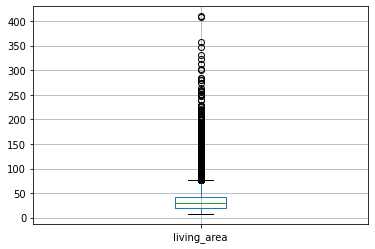

In [100]:
df.boxplot('living_area')
plt.show()

Для наглядности изменим масштаб графика, ограничив его верхним и нижним значеним "усов"

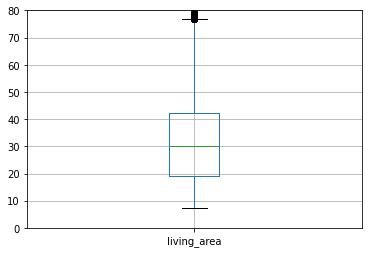

In [101]:
plt.ylim(0, 80)
df.boxplot('living_area')
plt.show()

Нижняя граница "уса" - 7,8 м2.  
Так мы изменили значения на *total_area * медианный коэффицент отношения общей к жилой* только в тех строках, где этот коэффициент был менее нижней границы стандартных значений и сами значения были меньше 10 м², значит 7,8 жилая площадь в какой-то очень маленькой квартире.

Построим гистограмму распределения, ограничив выборку значениями 7 и 80 м²:

<function matplotlib.pyplot.show(close=None, block=None)>

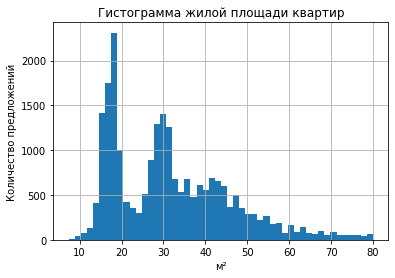

In [102]:
df.query('living_area >= 7 and living_area <= 80')['living_area'].hist(bins=50)
plt.xlabel('м²')
plt.ylabel('Количество предложений')
plt.title('Гистограмма жилой площади квартир')
plt.grid(True)
plt.show

Мы имеем проседание графика на количестве квратир с жилой площадью 20-25 м², и скачок на 16-22 м². Если подумать логически, то возможно это из-за того что в 1-комнатных и 2х-комнатных квартирах жилые площади дейстивтельно распределяются в этих пределах.

Давайте проверим это предположение. Построим график, поделенный на шестиугольники, ограничив выборку до 5 комнат включительно (считая, что остальные значения встречаются достаточно редко относительно 1-, 2-, 3-комнатных квартир) и жилой площадью 60 м² (потому что на гистограмме квартиры с площадью выше встречаются реже)

<AxesSubplot:xlabel='rooms', ylabel='living_area'>

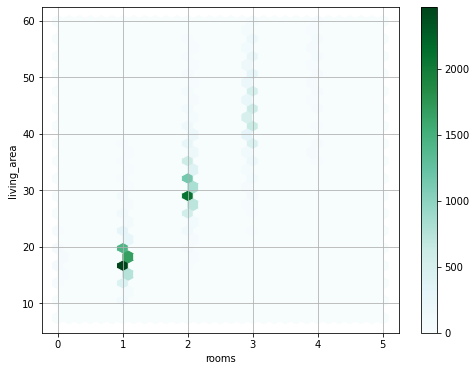

In [103]:
rooms_lim = df.query('rooms <= 5 and living_area < 60' )
rooms_lim.plot(x='rooms', y='living_area', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

О, да. На графике видно что очень много однокомнатных квартир с жилой площадью примерно 16-21 (самый темный шестиугольник), еле заметные шестиугольники от 22 до 27 м², и яркий зеленый шестиугольник двухкомнытных квартир с жилой площадью около 29, плюс видимые шестиугольники до 35. 

**Вывод**
  
Средние значения лежат в промежутке между 19 и 42 м².  
Максимальное число квартир в объявлениях (около 6900), жилая площадь которых примерно 19 м² - в основном однокомнатные квариры.  
Квартир с жилой площадью 21-26 м² - одно- и двухкомнатные около 3200 объявлений.  
Около 4500 объявлений по продаже двухкомнатных квартир, жилой площадью 29-26 м².  
3000 объявлений с квартирами 36-43 м².
Далее количество объявлений идет на спад.

###### Площадь кухни:

Выведем диаграмму размаха:

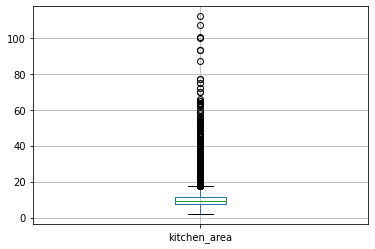

In [104]:
df.boxplot('kitchen_area')
plt.show()

Так как число объявлений со стандартными квартирами преволируют, то и площадь кухни в основном до 18 м² - стандартно. Остальные значения находятся за границами верхнего "уса" - 18м².
Для наглядности изменим масштаб графика, ограничив его верхним значением "уса"

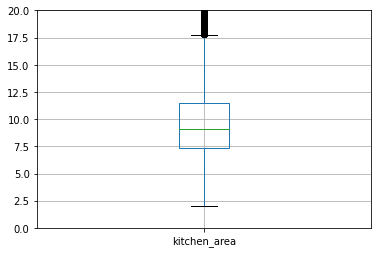

In [105]:
plt.ylim(0, 20)
df.boxplot('kitchen_area')
plt.show()

Нижняя граница "уса" - 2 м², верхняя около 18.    
Стандартные значения - 7,3-11,5 м². 

Построим гистограмму распределения, ограничив выборку значениями 7 и 12 м²:

<function matplotlib.pyplot.show(close=None, block=None)>

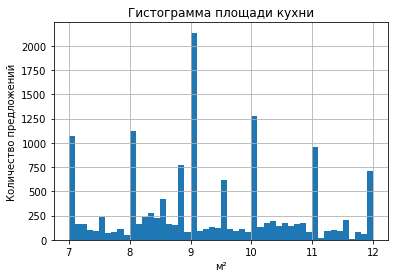

In [106]:
df.query('kitchen_area >= 7 and kitchen_area <= 12')['kitchen_area'].hist(bins=50)
plt.xlabel('м²')
plt.ylabel('Количество предложений')
plt.title('Гистограмма площади кухни')
plt.grid(True)
plt.show

**Вывод**
  
Средние значения лежат в промежутке между 7,33 и 11,5 м². Самое часто встречающееся значение площади кухни около 9 м².

##### Изучим цены объектов:

Выведем описание столбца и диаграмму размаха:

count   23631.00
mean        6.54
std        10.90
min         0.43
25%         3.41
50%         4.65
75%         6.80
max       763.00
Name: last_price, dtype: float64


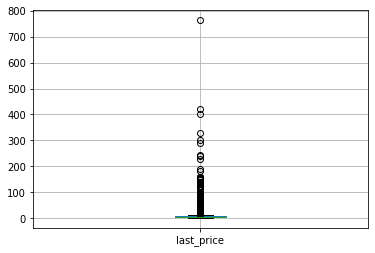

In [107]:
print(df['last_price'].describe())

df.boxplot('last_price')
plt.show()

Для наглядности изменим масштаб графика, ограничив его верхним значением "уса"

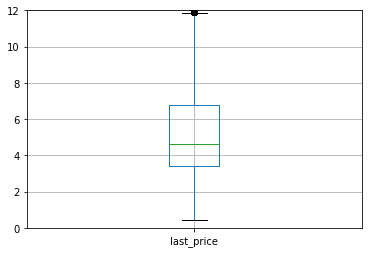

In [108]:
plt.ylim(0, 12)
df.boxplot('last_price')
plt.show()

Большая часть значений лежит в диапазоне до 7 млн., что выглядит правдаподобно.  
Первый квартиль на уровне 3.4 млн.  
Нижний "ус" упирается в 0.4 млн, оно же является минимальным значением - 0,43 млн (для отдаленного поселения вполне правдоподобная цена).  
Согласно диаграмме размаха и описанию столбца, верхний "ус" заканчивается около 12 млн. Данные выше этого значения считаются выбросами. С другой стороны, есть много ну очень дорогой недвижимости, стоимость которой выглядит норм.  

Посторим гистограмму, исключив выбросы:

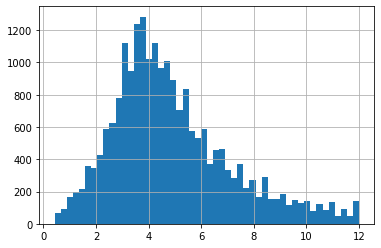

In [109]:
df.query('last_price >= 0.43 and last_price <= 12')['last_price'].hist(bins=50)
plt.show()

Гистограмма показывает нормальное распределение, пик которой по количеству объявлений достигает с объектами недвижимости, стоимостью 3,8 млн.

**Вывод**  
  
Большая часть объявлений - стандартные квартиры, со стандартными ценами от 3.4 млн до 6.8 млн. Есть недвижимость за 763 млн - это максимальное значение. Самое большое количество объявлений для цены 3,8 млн.

##### Изучим количество комнат:

Выведем описание столбца и диаграмму размаха:

count   23631.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

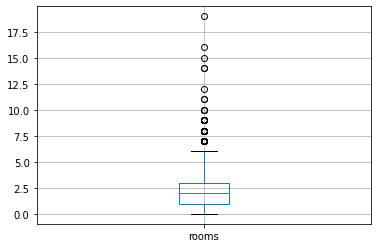

In [110]:
display(df['rooms'].describe())

df.boxplot('rooms')
plt.show()

"Усы" размаха начинаются в нуле - это наши квартиры-студии, а также со свободной планировкой.  
средние значения для квартир с 1, 2 и 3-мя комнатами, что вполне естественно для нашей страны. Однако Верхняя граница "уса" заканчивается шестью комнатами, так как в объявлениях есть очень разные значения, до 19 комнат в объекте недвижимости.  Выше 6 комнат - объекты, которые встречаются реже.

  
Посторим гистограмму, исключив выбросы:

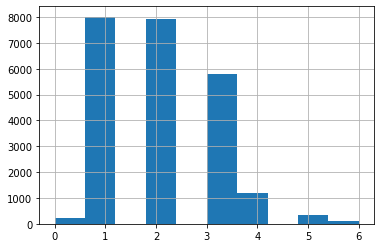

In [111]:
df.query('rooms <= 6')['rooms'].hist()
plt.show()

8к объявлений с одной комнатой, чуть меньше 8к - двухкомнатные объекты, около 5800 - с трехкомнатными. 0 - это наши квартиры-студии.

**Вывод**  
  
Самые распространенные объекты недвижимости в продаже - 1, 2 и 3-комнатные.

##### Изучим высоту потолков:

Выведем описание столбца и диаграмму размаха:

count   23631.00
mean        2.70
std         0.25
min         2.30
25%         2.60
50%         2.64
75%         2.70
max        10.30
Name: ceiling_height, dtype: float64

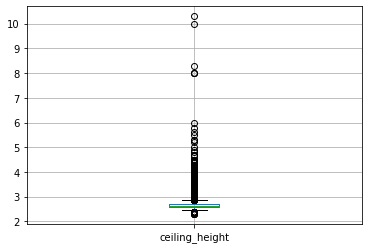

In [112]:
display(df['ceiling_height'].describe())

df.boxplot('ceiling_height')
plt.show()

Мы видим максимальное значение 10.3 (выше 11 мы меняли или удаляли). Значения выше 3 метров лежат за пределами "усов" - выбросы. Нижняя граница 2,3 - ниже мы также либо меняли, либо удаляли.  
  
Для наглядности изменим масштаб графика, ограничив его 2.3 и 3 метрами:

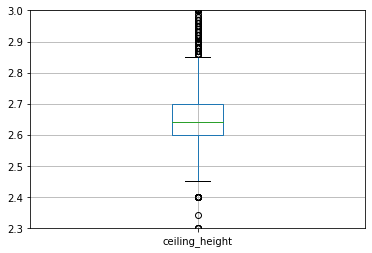

In [113]:
plt.ylim(2.3, 3)
df.boxplot('ceiling_height')
plt.show()

"Усы" размаха начинаются в значении 2,45 м и заканчиваются 2,85.
Средние значения 2,6 - 2,7, если для Ленинградской области - это вполне нормальное значение, то для самого Санкт-Петербурга, возможно нет, так в центре высота потолков по моим наблюдениям выше. Скорее всего и объявлений по продаже квартир в центре мало.

  
Посторим гистограмму, исключив выбросы:

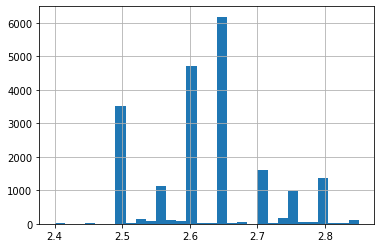

In [114]:
df.query('ceiling_height >= 2.4 and ceiling_height <= 2.85')['ceiling_height'].hist(bins=30)
plt.show()

Чуть больше 6 тысяч объявлений с квартирами высота потолка которых 2,65 м.  
Около 4,6 тысяч для квартир с потолками 2,6 м.
На третьем месте недвижимость, высота потолков которой в районе 2,5 м.

**Вывод**  
  
Из-за того что мы стандартизировали высоту потолков - данные мы получили так же стандартные. Однако, считаю, что владельцы объектов недвижимости, с большими значениями высоты потолка не должны были пропускать это поле, так как от высоты потолков стоимость квартиры должна прибавляться (это мы проверим далее). Значит пропущенные значения мы вправе были заполнить средними значениями. *(выкрутилась)* 

##### Изучим этажи, на которых располагаются квартиры:

Выведем описание столбца и диаграмму размаха:

count   23631.00
mean        5.89
std         4.88
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

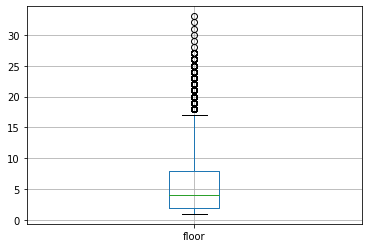

In [115]:
display(df['floor'].describe())

df.boxplot('floor')
plt.show()

"Усы" размаха начинаются в на 1 - первый этаж, куда без него и заканчиваются 17 этажом.  
Максимальный этаж 33.  

  
Посторим гистограмму, исключив выбросы:

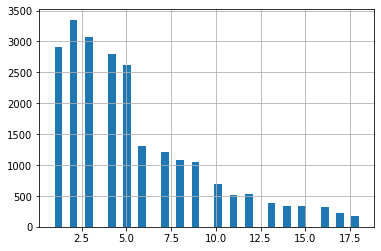

In [116]:
df.query('floor <= 18')['floor'].hist(bins=40)
plt.show()

Максимальное количество объявлений для квартир на 2 этаже. Далее на 3м, 1м, 4 и 5м. Далее тренд идет на спад начиная с 6го этажа.

**Вывод**  
  
Максимальное количество объявлений для квартир на 2 этаже. Квариры до 5 этажа преобладают в объявлениях. Есть существенная часть объявлений для недвижимости с 6 по 17 этажи. Самый высокий этаж в объявлениях - 33. 

##### Изучим тип этажей квартир:

Выведем количество значений столбца:

In [117]:
df['floor_type'].value_counts()


другой       17313
последний     3409
первый        2909
Name: floor_type, dtype: int64

Посторим гистограмму:

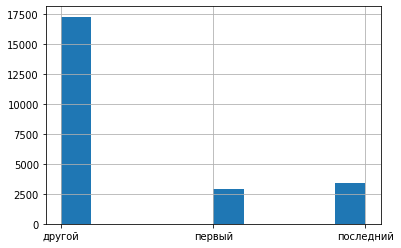

In [118]:
df['floor_type'].hist()
plt.show()

**Вывод**  
  
Максимальное количество объявлений для квартир на этажах, отличных от первого и полседнего. Квартир на последнем этаже 3409, на первом 2909.

##### Изучим общее количество этажей в доме:

Выведем описание столбца и диаграмму размаха:

count   23631.00
mean       10.67
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

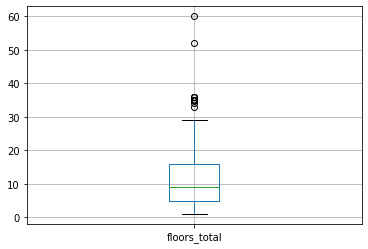

In [119]:
display(df['floors_total'].describe())

df.boxplot('floors_total')
plt.show()

"Усы" размаха начинаются в на 1 - первый этаж и заканчиваются 29 этажом.  
Средние значения для домов с 5-15 этажами. Выше этого значения количество домов незначительное.
Максимальный этаж 60.  

  
Посторим гистограмму, исключив выбросы:

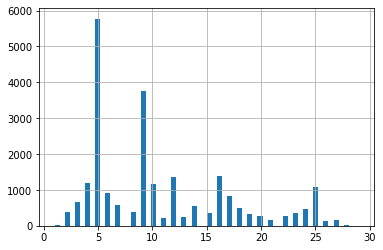

In [120]:
df.query('floors_total <= 30')['floors_total'].hist(bins=60)
plt.show()


Максимальное количество объявлений в пятиэтажных домах (более 5,5к), далее идут 9-тиэтажки (3,7к объявлений), 12-ти и 17-тиэтажные дома стоят на 3 месте (примерно по 1350 обяъвлений), на 4м месте 4-этажки, на 5м - 15 этажные дома (чуть более 1к объявлений). 

**Вывод**  
  
В объявлениях преобладают 5-ти и 9-тиэтажные дома. 

Выведем диаграмму размаха:

##### Изучим расстояния до центра города (в метрах):

Мы помним, что у нас 5,5к пропусков. Выведем описание столбца и диаграмму размаха:

count   18131.00
mean    14197.38
std      8607.91
min       181.00
25%      9241.00
50%     13105.00
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64

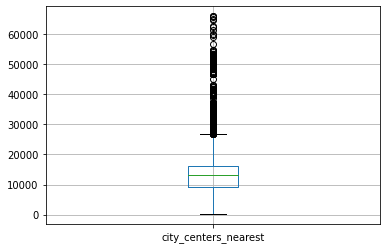

In [121]:
display(df['city_centers_nearest'].describe())

df.boxplot('city_centers_nearest')
plt.show()

"Усы" размаха начинаются в 0 и заканчиваются 27 км.  
Средние значения 9,2 - 16,3 км от центра. Выше этого значения количество объектов выбросы.
Максимальный расстояние 66 км.  

  
Посторим гистограмму, исключив выбросы:

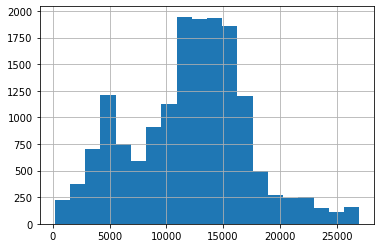

In [122]:
df.query('city_centers_nearest <= 27000')['city_centers_nearest'].hist(bins=20)
plt.show()


Максимальное количество объявлений в пределах 11-16 км, далее идут 4км и 16,5 (по 1200 объявлений),на третьем месте удаленность от центра города 10 км. 

**Вывод**  
  
Основное количество объявлений сосредоточено в пределах 16 км от центра города. 

##### Изучим расстояния до ближайшего аэропорта:

Мы помним, что у нас 5,5к пропусков. Выведем описание столбца и диаграмму размаха:

count    18110.00
mean     28842.17
std      13136.85
min          0.00
25%      18576.00
50%      26757.00
75%      37310.00
max     370000.00
Name: airports_nearest, dtype: float64

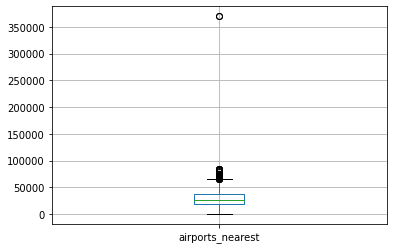

In [123]:
display(df['airports_nearest'].describe())

df.boxplot('airports_nearest')
plt.show()

Максимальное расстояние до аэропорта 370 км мы заполняли вручную для Вознесенья))) Зря. Потому что более 100 км значений больше нет.   
Значения выше 70 км лежат за пределами "усов" - это выбросы. Нижняя граница 0.  
  
Для наглядности переведем значения столбца в км, разделив все значеия на 1000:

In [124]:
df['airports_nearest'] /= 1000

Ограничим диаграмму размерами ее "усов" - 0-70 км:

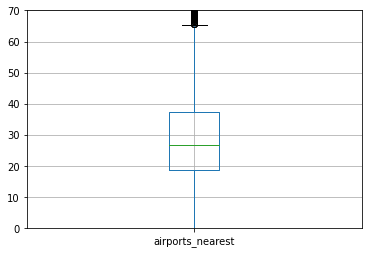

In [125]:
plt.ylim(0, 70)
df.boxplot('airports_nearest')
plt.show()

"Усы" размаха начинаются в 0 и заканчиваются 65 км.  
Средние значения 18,5 - 37,3 км до аэропорта. 
  
Посторим гистограмму, исключив выбросы:

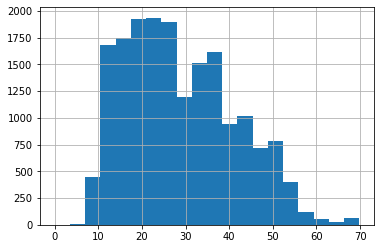

In [126]:
df.query('airports_nearest <= 70')['airports_nearest'].hist(bins=20)
plt.show()


Распределение стремится к нормальному. В районе 5 км от аэропорта есть незначительное количество объявлений о продаже. В основном продаются квартиры в радиусе 10-28, 31-38 и далее количество объявлений идет на спад. Есть небольшое проседание в количестве в радиусе 30 км.

**Вывод**  
  
Основное количество объявлений сосредоточено в пределах 10-28 км до аэропорта. 

##### Изучим расстояния до ближайшего парка:

Мы помним, что у нас 15,6к пропусков (почти 66%). 
Посмотрим уникальные значения в столбце "locality_name" (есть подозрение что ближайшие парки указаны только для СПб).

In [127]:
df.loc[df['parks_nearest'].notna(), ['locality_name']].value_counts()

locality_name  
Санкт-Петербург    7280
Пушкин              212
Петергоф            143
Колпино             133
Кронштадт            87
Сестрорецк           72
Красное Село         46
Павловск             26
Стрельна             19
Зеленогорск          16
Ломоносов            16
Парголово            10
dtype: int64

Все перечисленные населенные пункты находятся ну очень рядом с Санкт-Петербургом. Возможно система, которая заполняла эту таблицу была ограничена условием, например по наименованиям населенных пунтков. Для деревни, находящийся рядом парк редкость, и не ключевой фактор в принятии решения для покупки, так как рядом с дееревнями должны быть леса, поля.  
Теперь мы знаем локации, в которых указан ближайший парк и будем ориентироваться на этот показатель.  
Выведем описание столбца и диаграмму размаха:

count   8060.00
mean     490.78
std      342.59
min        1.00
25%      287.75
50%      454.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

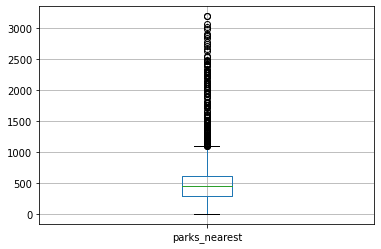

In [128]:
display(df['parks_nearest'].describe())

df.boxplot('parks_nearest')
plt.show()

Максимальное расстояние до парка 3190 м.  
Значения выше 1200 м лежат за пределами "усов" - это выбросы. Нижняя граница 0.  

Построим гистограмму, ограничив размерами ее "усов":

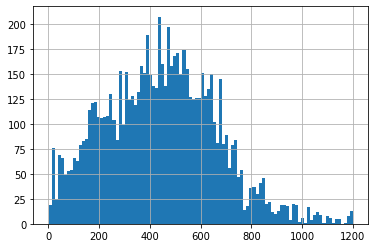

In [129]:
df.query('parks_nearest <= 1200')['parks_nearest'].hist(bins=100)
plt.show()


Распределение стремится к нормальному. Большинство объектов имеет парк рядом в районе 440 метров. Парк на расстоянии от 0 до 400 м - количество объявлений растет, далее 400м - идет на спад. От 1 км совсем мало объявлений (порядка 10 шт. на каждые 100 м.)

**Вывод**  
  
Основное количество недвижимости выставленной на продажу имеет рядом парк в районе 400-450 м. И это объявления для квартир в Петербурге и его окресностях.

##### Изучим дни и месяцы публикаций объявлений:

Выведем описание столбцов и диаграммы размаха:

'День недели размещения объявления'

count   23631.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday_exposition, dtype: float64

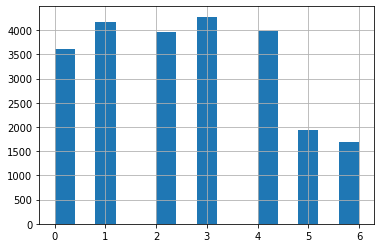

'Месяц размещения объявления'

count   23631.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64

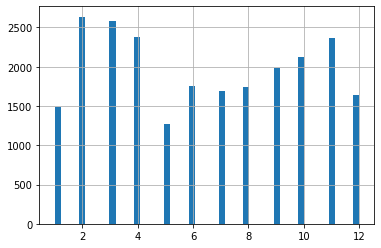

In [130]:
display('День недели размещения объявления', df['weekday_exposition'].describe())

df['weekday_exposition'].hist(bins=15)
plt.show()

display('Месяц размещения объявления', df['month_exposition'].describe())

df['month_exposition'].hist(bins=50)
plt.show()


**Вывод**  
  
Чаще всего люди размещают объявления в четверг и вторник. По средам и пятницам тоже часто, но чуть сдержаннее. Понедельник на четвертом месте по публикации. В выходные люди в 2 раза реже размещают объявления. Возможно это связано с риелторами, которые помогают людям и размещают за них объявления в свои рабочие дни.  
  
Месяц, в котором люди чаще всего публикуют объявление о продаже недвижимости - февраль. Следом, уступаяя совсем немного в количестве, идут март и апрель. Май - самый не публикуемый месяц (оно и понятно, майские, все хотят отдыхать, странно что не январь). Начиная с юиля люди активнее размещают объявления, вплоть до ноября (ноябрь догоняет апрель). Декабрь не самый публикуемый месяц.

##### Рассмотрим, как быстро продавались квартиры (столбец `days_exposition`)

count   23631.00
mean      185.78
std       233.52
min         0.00
25%        43.00
50%        94.00
75%       237.00
max      1618.00
Name: days_exposition, dtype: float64

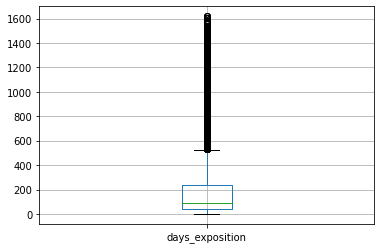

In [131]:
display(df['days_exposition'].describe())

df.boxplot('days_exposition')
plt.show()

Медиана времени продажи находится на уровне 94 дней, а среднее значение - 186 дней. Такая разница между медианой и средним значением (3 и 6 месяцев) говорит нам о том, что есть много выбросов с более длительным сроком продажи.  
  
Средние значения лежат в промежутке 43 - 237 дней. Максимальное число дней, которое объект недвижимости продавался - 1618 дней (4,5 года). Значения выше границы верхнего "уса" (примерно 550 дней - больше 1,5 лет) - выбросы.  
Ограничим диаграмму значениями "усов".


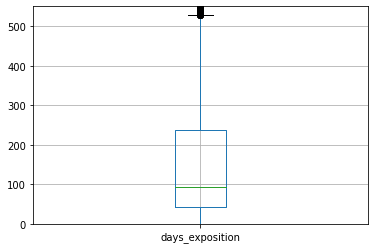

In [132]:
plt.ylim(0, 550)
df.boxplot('days_exposition')
plt.show()

Посмотрим на гистограмму. Границы возьмем 0 и верхнее значенее "ящика" (примерно 250).

<AxesSubplot:>

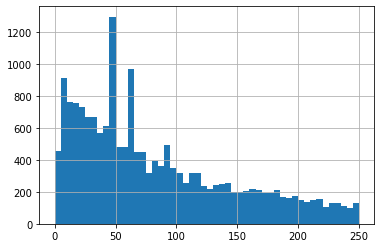

In [133]:
df.query('days_exposition <= 250')['days_exposition'].hist(bins=50)

Видим какие-то 2 скачка на уровне 15, 50 и 65 дней. За такое количество дней продавалось максимальное число квартир.  
Увеличим масштаб в этих границах:

<AxesSubplot:>

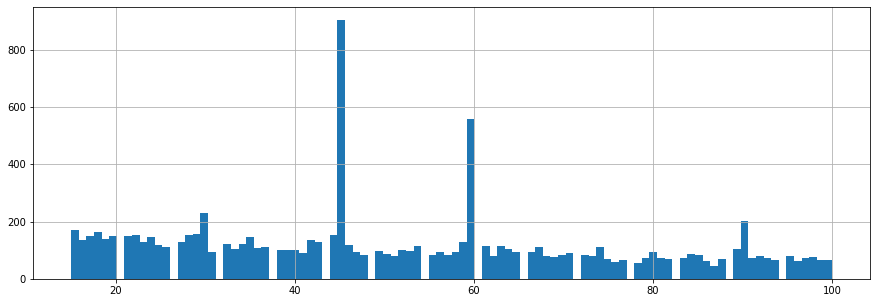

In [134]:
df.query('days_exposition >= 15 and days_exposition <= 100')['days_exposition'].hist(bins=100, figsize=(15, 5))

Эмм.. на 45й день максимальное количество проданных квартир? и на 60-й? Числа "красивые", возможно это автоматические закрытия, например, если объявление не обновлялось 45 или 60 дней, его закрывают. Интересно по какому условию закрывают (если закрывают). Я даже предположит не могу...  

**Вывод**

Из графиков видно, что быстрее всего продажа происходила в первые 2 месяца. Быстрыми продажами можно считать до 8,5 месяцев (верхняя граница "ящика"). Если количество дней переваливает за 550, то можно считать, что квартира очень долго не продается, возможно стоит понизить цену).

***Выводы по разделу 2.4.1***

Рынок жилья представлен объектами общей площадью от 12 до 900 м². В основном это жилье общей площадью от 25 до 100 м², с пиком в сегменте 30-70 м². В жилой площади квартиры преобладает диапазон 19-42 м², и с несколько меньшим, но пиком в диапазоне 20 м². Размер площади кухни в основном от 7 до 12 м², с пиком 9 м². Это стандартные небольшие квартиры, которые очень распространены в наших городах и являются типичными для среднестатистической квартиры эконом-класса. Подавляющее большинство квартир 1-3-хкомнатные, с высотой потолка 2,6-2,7 м, но встречаются редкие варианты до 19 комнат и высотой потолка до 10,3 м.  

Цены на квартиры в основном находятся в диапазоне 2-6,8 млн.руб. с пиком в области 3,8 млн.руб.(небольшие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 763 млн.руб.  

В основном недвижимость продается на 1-17 этажах. Самый высокий этаж объекта 33. Максимальное число объявлений на 2-8 этажах с пиком на 4 этаже. На первом этаже квартир продается наименьшее количество - 2909, на последнем на 500 больше - 3409. Остльаные на других этажах. В объявлениях преобладают 5-тиэтажные дома, 9-ти и 12, 17 (примерно одинаковое количество объявлений в 12 и 17-тиэтажках).  

Расстояние до центра города в среднем 9,2-16,3 км. с небольшим пиком около 5 км и максимальным пиком 12-14 км. Расстояние до аэропорта в основном 10-28 км. Ближайшие парки указаны для квартир Санкт-Петербурга и его окресностей. Основное количество недвижимости выставленной на продажу имеет рядом парк в районе 400-450 м.  

Максимальный срок продажи недвижимости - 1618 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных - 186 дней. При этом можно увидеть, что пик продаж приходится на конец второго месяца со дня публикации. Исходя из графиков можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 10 дней и слишком долго, если до оформления сделки свыше 550 дней.

#### Построим графики, которые показывют зависимость цены от рaзличных параметров 


##### График зависимости цены от общей площади

Ограничимся данными по общей площади, исключив выбросы (все, что выше 115 м²). Построим график.

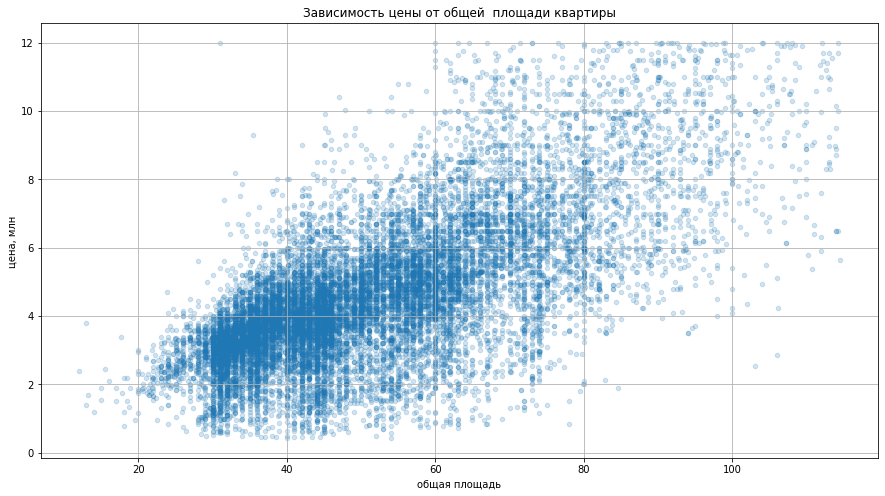

In [135]:
#создадим отдельный датафрейм со всеми строками без выбросов, где:
#общая площадь меньше 115 м² 
#цена от 0,43 до 12 млн р.
#количество комнат до 6 включительно
#высота потолка от 2,4 до 2,85 м
#и ограничимся годами с 2015 по 2019


select_df = df.query('total_area < 115 and \
                     (0.43 <= last_price <= 12) and \
                     (2.4 <= ceiling_height <= 2.85) and \
                     (2014 < year_exposition < 2019) and \
                     rooms <= 6')
                     

#строим график по годам общей площади
select_df.plot(x='total_area', y='last_price',  grid=True, kind='scatter', alpha=0.2, figsize=(15, 8), sharex=False, 
                       title='Зависимость цены от общей  площади квартиры').set(
                       xlabel='общая площадь', ylabel='цена, млн ');
    

Из графика видно, чем больше площадь, тем выше стоимость (и разброс цен). Основная масса объявлений сосредоточена в диапазоне общей площади от 30 до 43 м² и с ценами от 2 до 5 млн. и с четким ростом цены с увеличением общей площади квартир. Мы также видим большой разброс цен почти по всем значениям общей площади, начиная от 30 м² и чем дальше, тем он более ощутим.

Выведем коэффициент Пирсона:

In [136]:
print('Корреляция:', select_df['last_price'].corr(select_df['total_area']))

Корреляция: 0.6896903770027137


**Вывод**  

Зависимость цены от общей площади прослеживается, причем заметная положительная связь.

##### График зависимости цены от жилой площади

Ограничимся данными по общей площади, исключив выбросы (все, что выше 80 м²). За основу возьмем предыдущий датафрейм без 2 выбивающихся значений по цене в 24 и 39,9 млн для небольших площадей.  
Построим график.

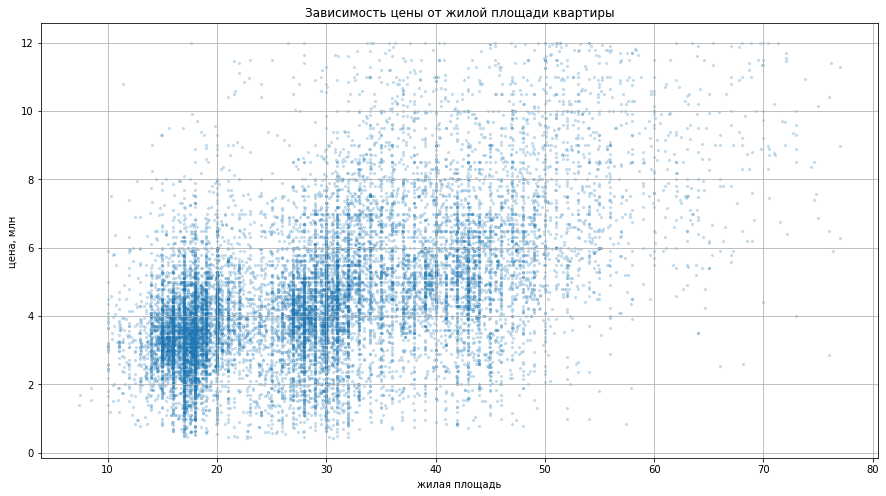

In [137]:
select_df_living = select_df.query('living_area < 80')

#строим график зависимости цены от общей площади

select_df_living.plot(x='living_area', y='last_price', grid=True, kind='scatter', alpha=0.2, figsize=(15, 8), sharex=False, s=5,
              title='Зависимость цены от жилой площади квартиры').set(
              xlabel='жилая площадь', ylabel='цена, млн ');

Зависимость как бы есть, потому что график стремится вврех, но в то же время, для квартир с жилой площадью от 15 до 22 м² разброс цен от 0,8 до 6 млн. А вот для квартир с жилой площадью 26-32 м² цены уже выше от 1,2 до 7.

Выведем коэффициент Пирсона:

In [138]:
print('Корреляция:', select_df_living['last_price'].corr(select_df_living['living_area']))

Корреляция: 0.5544733621227854


**Вывод**  

Зависимость цены от общей площади прослеживается, причем заметная положительная связь. Однако влияет чуть меньше, чем общая площадь.

##### График зависимости цены от площади кухни

Ограничимся данными по площади кухни, исключив выбросы (все, что выше 18 м²). За основу возьмем предыдущий датафрейм без 2 выбивающихся значений по цене в 24 и 39,9 млн для небольших площадей.  
Построим график.

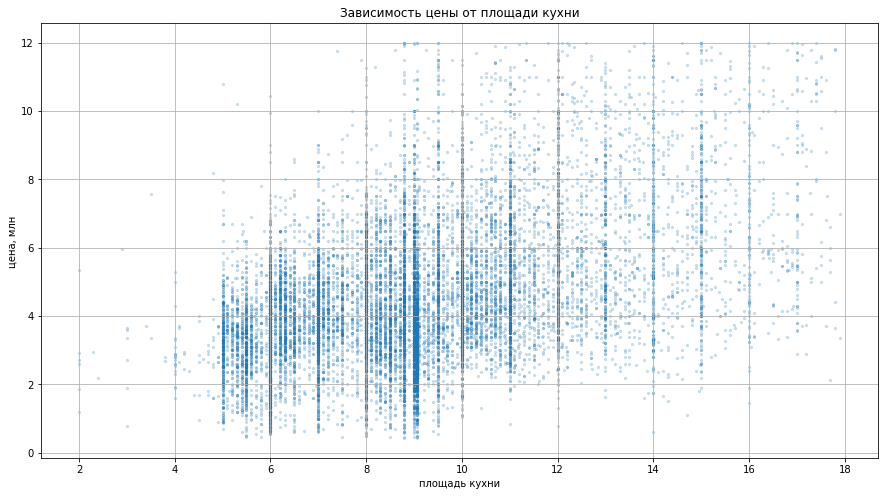

In [139]:
select_df_kitchen = select_df.query('kitchen_area < 18')
#(
#    select_df_kitchen
#    .pivot_table(index='kitchen_area', columns='year_exposition', values='last_price')
#    .plot(title='Зависимость цены от площади кухни - данные из ДФ, где общая площадь меньше 115 м² и площадь кухни до 18 м²',
#          grid=True, figsize=(15,5))
#)

select_df_kitchen.plot(x='kitchen_area', y='last_price', grid=True, kind='scatter', alpha=0.2, figsize=(15, 8), sharex=False, s=5,
              title='Зависимость цены от площади кухни').set(
              xlabel='площадь кухни', ylabel='цена, млн ');

Выведем коэффициент Пирсона:

In [140]:
print('Корреляция:', select_df_kitchen['last_price'].corr(select_df_kitchen['kitchen_area']))

Корреляция: 0.4659376214687041


**Вывод**  

Зависимость цены от площади кухни прослеживается, причем умеренная положительная связь. Однако площадь кухни влияет меньше на стоимость квартир, чем общая площадь.

##### График зависимости цены от количество комнат

Ограничимся данными по количеству комнат, исключив выбросы (все, что выше 6 шт.)  
За основу возьмем предыдущий датафрейм без 2 выбивающихся значений по цене в 24 и 39,9 млн для небольших площадей.  
Построим график.

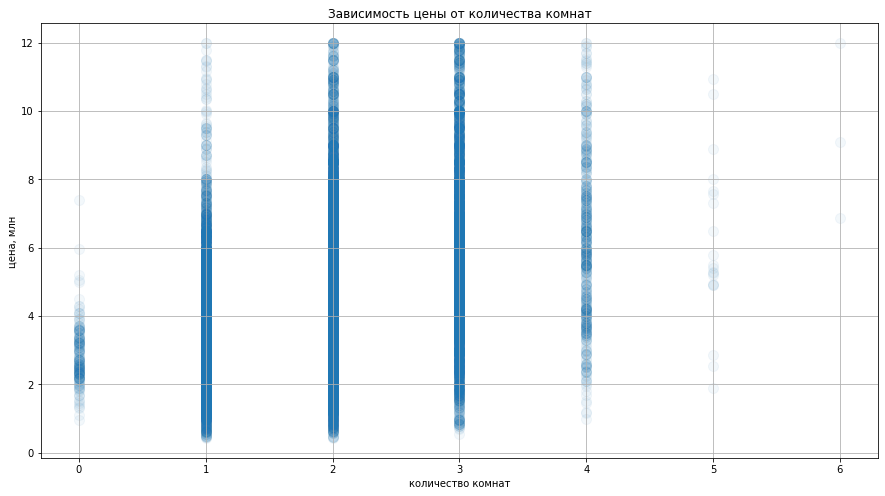

In [141]:
select_df.plot(x='rooms', y='last_price', grid=True, kind='scatter', alpha=0.05, figsize=(15, 8), sharex=False, s=100,
              title='Зависимость цены от количества комнат').set(
              xlabel='количество комнат', ylabel='цена, млн ');

График показывает уверенный рост цен при увеличении числа комнат вплоть до 4х комнт. Причем в основной массе продаются 1- 2- и 3-х комнатные квартиры. Для 5-тикомнатных объявлений сильно меньше, на графике они отображаются слабой линией. 6-комнатных раз-два и обчелся.

Выведем коэффициент Пирсона:

In [142]:
print('Корреляция:', select_df['last_price'].corr(select_df['rooms']))

Корреляция: 0.416018237992409


**Вывод**  

Зависимость цены от количества комнат прослеживается, причем умеренная положительная связь, особенно до 4-х комнат.

##### График зависимости цены от типа этажа, на котором расположена квартира (первый, последний, другой)

Построим график. За основу возьмем предыдущий датафрейм без 2 выбивающихся значений по цене в 24 и 39,9 млн для небольших площадей.

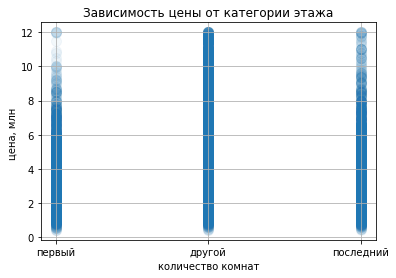

In [143]:
select_df.plot(x='floor_type', y='last_price', grid=True, kind='scatter', alpha=0.05, sharex=False, s=100,
              title='Зависимость цены от категории этажа').set(
              xlabel='количество комнат', ylabel='цена, млн ');

**Вывод**  
На первом этаже стоимость квартир самая низкая, на последнем - повыше, на других этажах - самая высокая. 

##### График зависимости цены от даты размещения (день недели, месяц, год)

###### Построим график зависимости цены от дня недели размещения.

Корреляция "цена от дня недели публикации": -0.005721220555606737


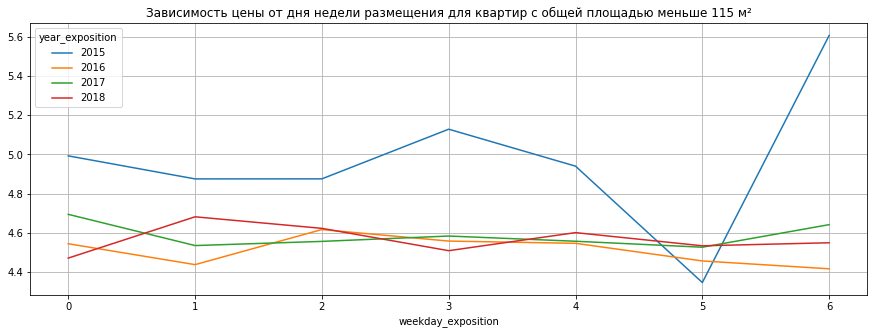

In [144]:
(
    select_df
    .pivot_table(index='weekday_exposition', columns='year_exposition', values='last_price')
    .plot(grid=True, title='Зависимость цены от дня недели размещения для квартир с общей площадью меньше 115 м²', figsize=(15,5))
)
print('Корреляция "цена от дня недели публикации":', select_df['last_price'].corr(select_df_kitchen['weekday_exposition']))


Коэффициент Пирсона отрицательный, и очень близок к 0 - взаимосвязи стоимости объекта от дня недели публикации нет.

###### Построим график зависимости цены от месяца размещения

Корреляция "цена от месяца публикации": 0.03049677194942731


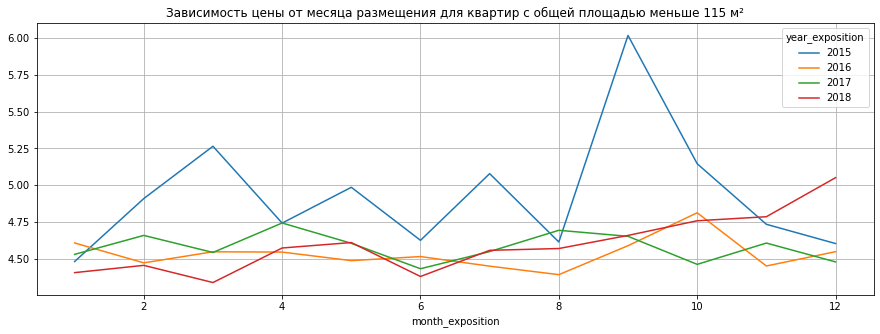

In [145]:
(
    select_df.
    pivot_table(index='month_exposition', columns='year_exposition', values='last_price')
    .plot(title='Зависимость цены от месяца размещения для квартир с общей площадью меньше 115 м²', grid=True, figsize=(15,5))
)
print('Корреляция "цена от месяца публикации":', select_df['last_price'].corr(select_df['month_exposition']))

Коэффициент Пирсона хоть и положительный, но очень близок к 0. Взаимосвязи стоимости объекта от месяца публикации нет. Хотя, в 2015 году был пик по стоимости в объявлениях в сентябре.

###### Построим график зависимости цены от года размещения

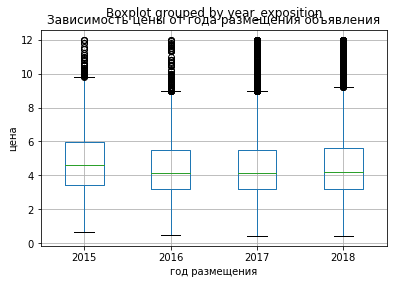

In [146]:
select_df.boxplot(column='last_price', by='year_exposition').set(
    title='Зависимость цены от года размещения объявления', 
    xlabel='год размещения', ylabel='цена');

То же для нагрядности посмотрим на диаграмме медианных значений:

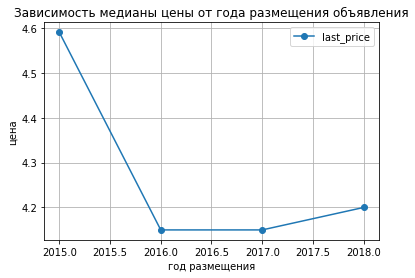

In [147]:
select_df.pivot_table(index='year_exposition', values='last_price', aggfunc='median'
                     ).reset_index().plot(x='year_exposition', y='last_price', grid=True, style='o-'
                                         ).set(title='Зависимость медианы цены от года размещения объявления',
                                               xlabel='год размещения', ylabel='цена'
                                              );

plt.show()

In [148]:
select_df.groupby('year_exposition')['year_exposition'].count()

year_exposition
2015     887
2016    2258
2017    6866
2018    7154
Name: year_exposition, dtype: int64

**Вывод**  

Из рассмотренных параметров мы обнаружили, что:
- Самая заметная зависимость цены от общей площади. Основная масса объявлений сосредоточена в диапазоне общей площади от 30 до 43 м² и с ценами от 2 до 5 млн. и с четким ростом цены с увеличением общей площади квартир. Мы также видим большой разброс цен почти по всем значениям общей площади, начиная от 30 м² и чем дальше, тем он более ощутим.
- Зависимость цены от жилой площади прослеживается, но она меньше, чем от общей. 
- Зависимость цены от площади кухни умеренная. Площадь кухни влияет меньше на стоимость квартир, чем общая площадь.
- Зависимость цены от количества комнат прослеживается, особенно до 4-х комнат, но корреляция самая маленькая.
 

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [149]:
#создаем новую переменную, в которую сохраним сводную таблицу, 
#где в качестве индекса будет название населенного пункта,  
#а в качестве значений цена за квадратный метр
#посчитаем количество этих значений и среднее значение

locality_name_pivot = (df.pivot_table(index='locality_name',
                                      values = ['price_square_meter'],
                                      aggfunc = ['count','mean']))
#назовем столбцы
locality_name_pivot.columns = ['count','mean']
#отсортируем по количеству по убыванию
locality_name_pivot.sort_values(by='count', inplace=True, ascending=False)

#оставим в осортированной таблице первые 10 строк 
locality_name_pivot = locality_name_pivot[:10]
locality_name_pivot

,count,mean
locality_name,,
Санкт-Петербург,15714,0.11
Мурино,590,0.09
Кудрово,471,0.10
Шушары,440,0.08
Всеволожск,397,0.07
Пушкин,369,0.10
Колпино,338,0.08
Парголово,327,0.09
Гатчина,307,0.07


**Вывод**  
Из топ-10 по количеству объявлений самая высокая цена в Санкт-Петербурге 110 000 р., а сама низкая в Выборге - 60 000 р. 

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Я прочитала из каких районов состоит Санкт-Петербург, и решила включить в отбираемые значения тсолбца locality_name еще и Кронштадт и Колпино.

[Text(0.5, 1.0, 'Средняя цена каждого километра Санкт-Петербурга'),
 Text(0.5, 0, 'километр'),
 Text(0, 0.5, 'стоимость')]

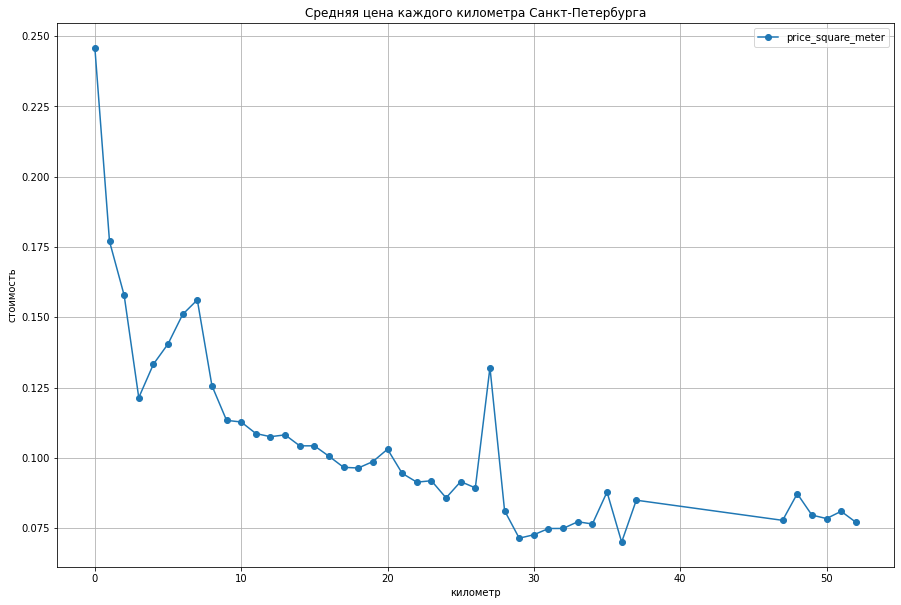

In [150]:
df_spb = df.query('locality_name == "Санкт-Петербург" or \
                  locality_name == "Кронштадт" or \
                  locality_name == "Колпино" and \
                  ~city_centers_nearest.isna()' 
                  ).sort_values(by='city_centers_average')

(df_spb.pivot_table(index='city_centers_average', 
                    values='price_square_meter',
                    aggfunc='mean').plot(legend= True, grid=True, style='o-', figsize=(15, 10)
                                        ).set(title='Средняя цена каждого километра Санкт-Петербурга',
                                              xlabel='километр', ylabel='стоимость'
                                              ))



Это было очень ожидаемо, что чем дальше от центра, тем цены ниже. Однако у нас есть проседание в районе 3 км от центра, пик в районе 27 км и разные колебания после 35 км. Возможно это связано с элитностью районов.

### Общий вывод

Представленные для анализа данные содержали информацию о конкретной квартире, выставленной на продажу. По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В процессе предварительной обработки данных были выявлены явные и неявные пропуски, ошибки представления значений (значения, не соответствующие действительности). Скорее всего, данные взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников клиентом. Указанные проблемы были устранены.

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены одного квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

Исследование показало, что на рынке недвижимости представлено жилье эконом и премиум класса с большим разбросом площади и цены. Основной видимый сегмент предложений находится в диапазоне эконом-класса: спросом пользуются 1-3 комнатные квартиры небольшой площади 30-70 кв.м. с ценой 3,4-6,8 млн.руб. Цена зависит от удаленности от центра, этажа (1-й и последний дешевле) и общей площади объекта (чем выше площадь, таем больше разброс цен), количества комнат (до 4 комнат цена растет). Прослеживается и сезонность цен: в целом к июню тенденция на спад. Это связано с экономикой: спад, как правило прослеживается в феврале и летом.

Максимальная стоимость жилья - в Санкт-Петербурге, минимальная - в Выборге (из ТОП-10). Предложения рынка недвижимости в центре Санкт-Петербурга характеризуется несколько большей площадью и ценой, чем прочие районы, но в целом предложений по квартирам с минимальной площадью также достаточно.